Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


['DOGE-USD', 'SAND-USD', 'TRX-USD', 'RUNE-USD']


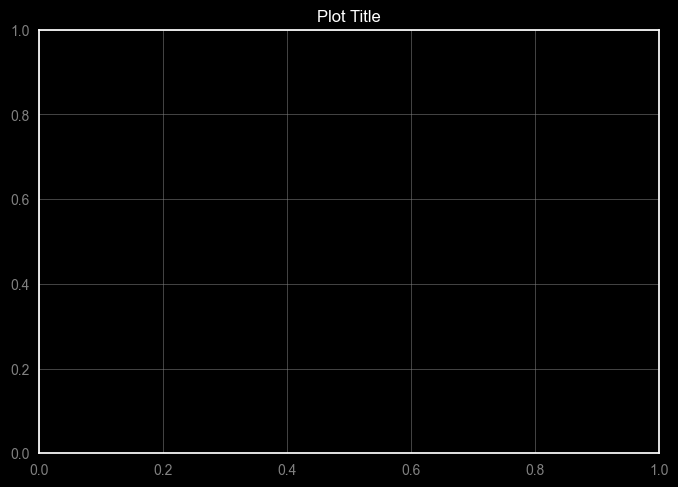

In [1]:
%matplotlib inline
%pip install yfinance
%pip install tensorflow
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *
from pycaret.regression import setup, create_model, tune_model, evaluate_model, compare_models
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from tensorflow.keras.models import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set dark mode style
plt.style.use('dark_background')

# Customize gridlines, axes, and title colors
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.75)
plt.gca().xaxis.label.set_color('grey')
plt.gca().yaxis.label.set_color('grey')
plt.gca().tick_params(colors='grey')
plt.title('Plot Title', color='white')

# List of cryptocurrencies
stock_list = ['DOGE-USD', 'SAND-USD', 'TRX-USD', 'RUNE-USD']

# Full names (optional) - Not used for downloading data
company_name = ["DOGE", "SANDBOX", "TRON", "THOR"]  # Added full names for reference

# Setting up start and end dates
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

# Download and store data in separate variables
downloaded_data = {}  # Dictionary to hold downloaded data
for stock in stock_list:
    downloaded_data[stock] = yf.download(stock, start, end)

# Still available (optional)
print(stock_list)  # List of cryptocurrencies remains unchanged

In [2]:
# Concatenation of lists to get one DataFrame with all stocks
company_list = stock_list

for stock, com_name in zip(company_list, company_name):
    downloaded_data[stock]["company_name"] = com_name

df = pd.concat(downloaded_data.values(), ignore_index=True)

In [3]:
df.sample(10)

Open      High       Low     Close  Adj Close     Volume  \
1529  0.055773  0.056102  0.052725  0.052955   0.052955  240564735   
455   0.079263  0.084450  0.076683  0.082942   0.082942  703451086   
1258  0.645270  0.655489  0.624356  0.636896   0.636896  183451645   
2261  1.448413  1.478691  1.311415  1.319752   1.319752   60439571   
1089  0.299193  0.299332  0.290283  0.297785   0.297785   69171745   
1384  0.318672  0.319435  0.297000  0.306902   0.306902   64762840   
730   0.105980  0.111344  0.105702  0.110733   0.110733  650490847   
2421  1.093974  1.123133  1.073578  1.120193   1.120193   21988524   
2452  0.969590  1.034973  0.968965  1.006875   1.006875   28275615   
946   0.500101  0.508377  0.495448  0.503197   0.503197   34972909   

     company_name  
1529         TRON  
455          DOGE  
1258      SANDBOX  
2261         THOR  
1089      SANDBOX  
1384      SANDBOX  
730          DOGE  
2421         THOR  
2452         THOR  
946       SANDBOX

In [4]:
# Data summary
sk.skim(df)
# sns.pairplot(df, hue='company_name', diag_kind='kde', palette='inferno')

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2928   │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Open     │  0 │    0 │   0.9764 │    1.704 │  0.05003 │  0.08483 │   0.2273 │   0.8472 │    10.62 │  ▇ ▁   │  │
│ │ High     │  0 │    0 │    1.013 │     1.78 │  0.05037 │  0.08691 │   0.2349 │   0.8873 │    11.45 │  ▇ ▁   │  │
│ │ Low      │  0 │    0 │   0.9403 │    1.629 │   0.0458 │  0.08316 │   0.2093 │    0.826 │    10.39 │  ▇ ▁   │  │
│ │ Close    │  0 │    0 │   0.9774 │    1.705 │  0.05004 │  0.08488 │   0.2273 │   0.8472 │    10.62 │  ▇ ▁   │  │
│ │ Adj      │  0 │    0 │   0.9774 │    1.705 │  0.05004 │  0.08488 │   0.2273 │   0.8472 │    10.62 │  ▇ ▁   │  │
│ │ Close    │    │      │          │          │          │          │          │          │          │        │  │
│ │ Volume   │  0 │    0 │ 25070000 │ 37650000 │ -2141000 │ 77600000 │ 19210000 │ 33900000 │ 21360000 │    ▇▁  │  │
│ │          │    │      │        0 │        0 │      000 │          │        0 │        0 │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ company_name               │      0 │          0 │                            1 │                     2928 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# [X] What was the change in price over time?

#### What is the Differnce between Adjusted Closing Price & Closing Price?
- Closing Price: The final price a stock trades at during a trading day.
- Adjusted Closing Price: The closing price adjusted for corporate actions (splits, dividends, rights offerings) to provide a more accurate representation of the stock's value.

#### Why is the adjusted closing price important?
- Accurate historical comparisons: When analyzing a stock's performance over time, the adjusted closing price provides a more accurate picture by accounting for corporate actions that could have artificially inflated or deflated the price.   
Fair valuation: It helps investors compare the value of a stock with other stocks, even if they have undergone different corporate actions.


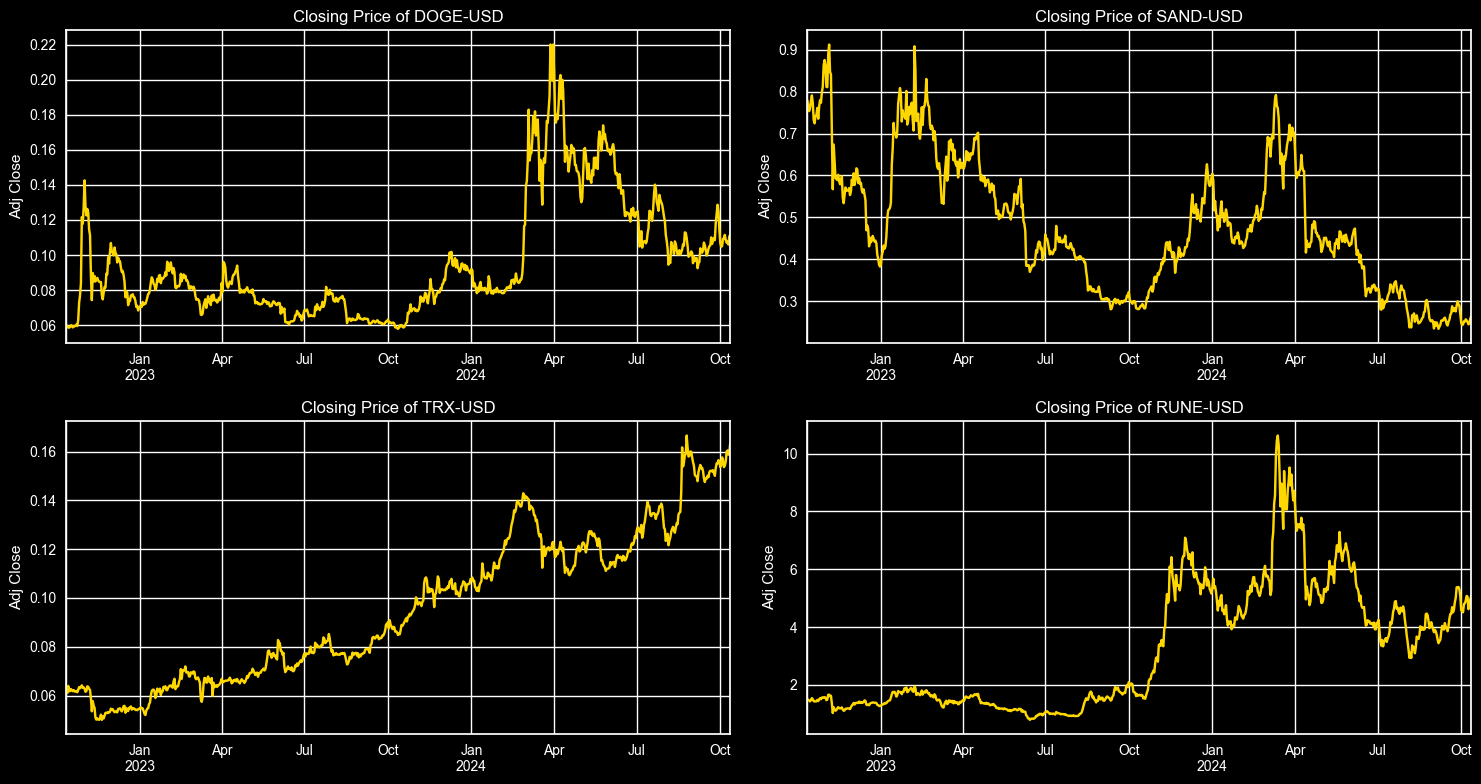

In [5]:
# Now ploting the closing price of all selected stocks

plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    downloaded_data[company]['Adj Close'].plot(color='gold')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")

plt.tight_layout()

#### What is Trading Volume?

- Trading volume is a measure of the number of shares traded during a specific time period. It provides insight into the level of market activity and investor interest in a particular security.
- For example, if a stock has a high trading volume, it indicates that many investors are actively buying and selling the stock.

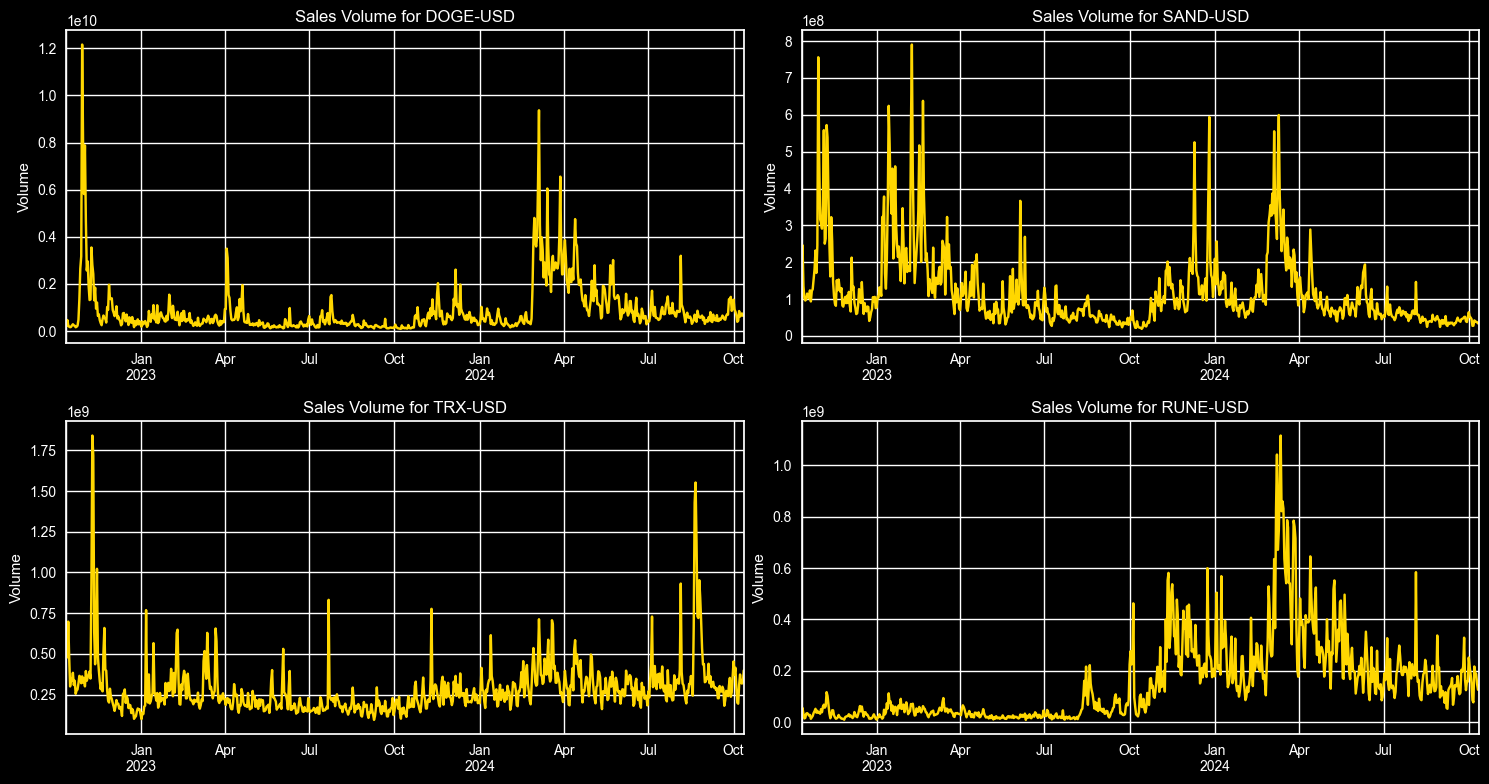

In [6]:
# Lets see total volume of selected stock being traded daily

plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    downloaded_data[company]['Volume'].plot(color='gold')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company}")

plt.tight_layout()

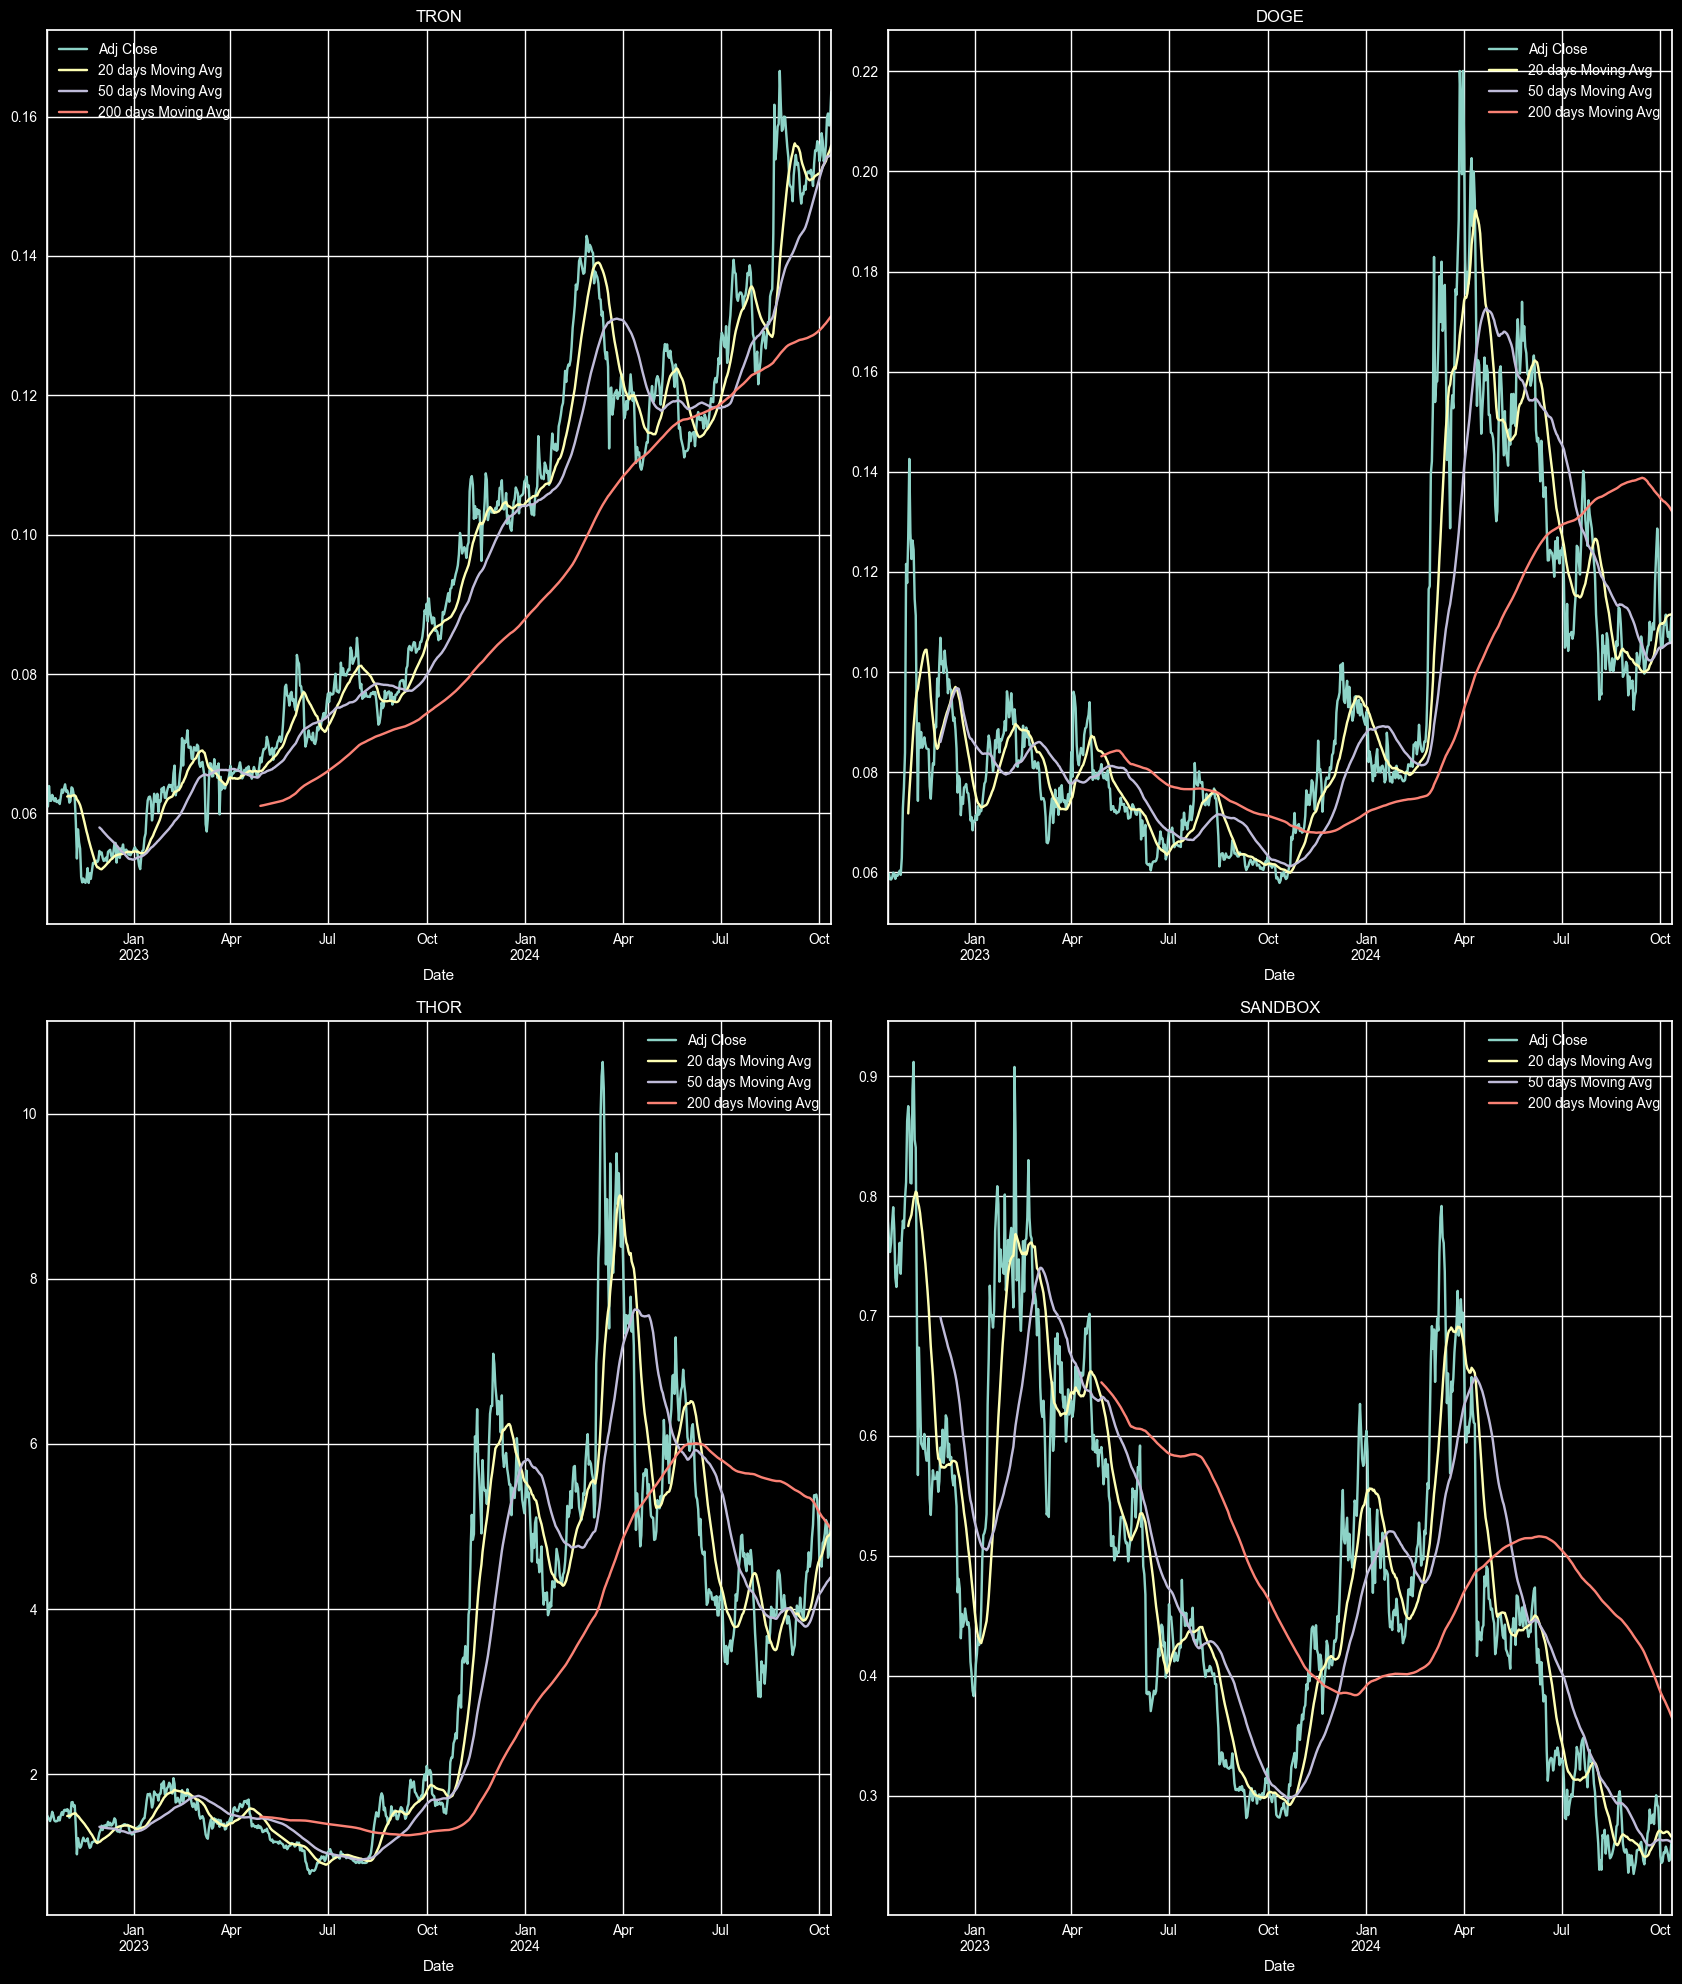

In [7]:
# Analysing Trends and Crossovers
#=====================================

ma_day = [20, 50, 200]  # Moving Average periods

for ma in ma_day:
    for company in company_list:
        column_name = f"{ma} days Moving Avg"  # col names by days
        downloaded_data[company][column_name] = downloaded_data[company]['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(17)

# Replace with your cryptocurrency tickers
downloaded_data['TRX-USD'][['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[0, 0], linestyle='-')
axes[0, 0].set_title('TRON')  # Replace with the appropriate cryptocurrency name

downloaded_data['DOGE-USD'][['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[0, 1], linestyle='-')
axes[0, 1].set_title('DOGE')  # Replace with the appropriate cryptocurrency name

downloaded_data['RUNE-USD'][['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[1, 0], linestyle='-')
axes[1, 0].set_title('THOR')  # Replace with the appropriate cryptocurrency name

downloaded_data['SAND-USD'][['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[1, 1], linestyle='-')
axes[1, 1].set_title('SANDBOX')  # Replace with the appropriate cryptocurrency name

fig.tight_layout()

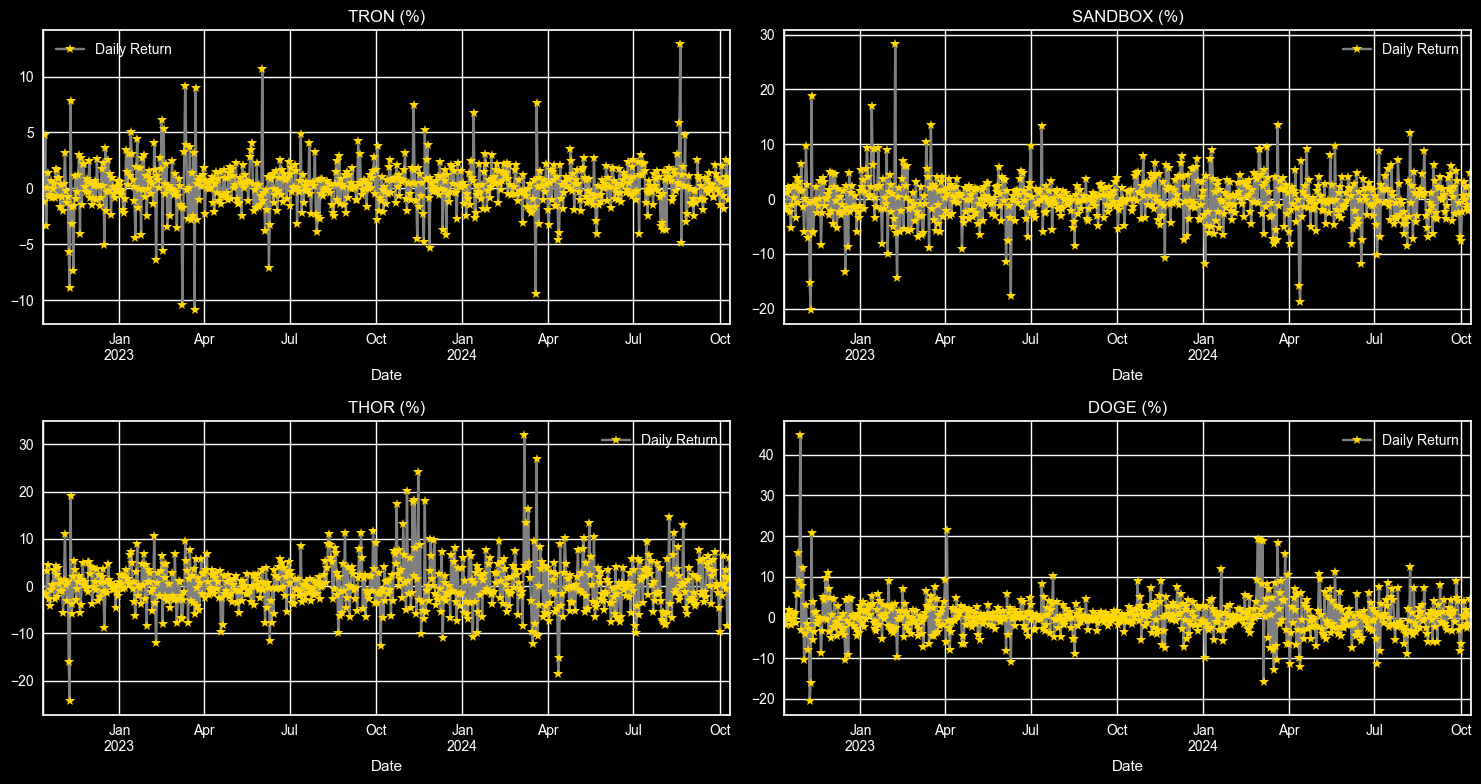

In [8]:
# Apply pct_change to find the change pct for each day
# Calculate Daily Returns
for company in company_list:
    downloaded_data[company]['Daily Return'] = downloaded_data[company]['Adj Close'].pct_change() * 100  # Multiply by 100 for percentage return

# Plotting Daily Returns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Replace with your cryptocurrency tickers
downloaded_data['TRX-USD']['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[0, 0].set_title('TRON (%)')

downloaded_data['SAND-USD']['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[0, 1].set_title('SANDBOX (%)')

downloaded_data['RUNE-USD']['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[1, 0].set_title('THOR (%)')

downloaded_data['DOGE-USD']['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[1, 1].set_title('DOGE (%)')

fig.tight_layout()
plt.show()

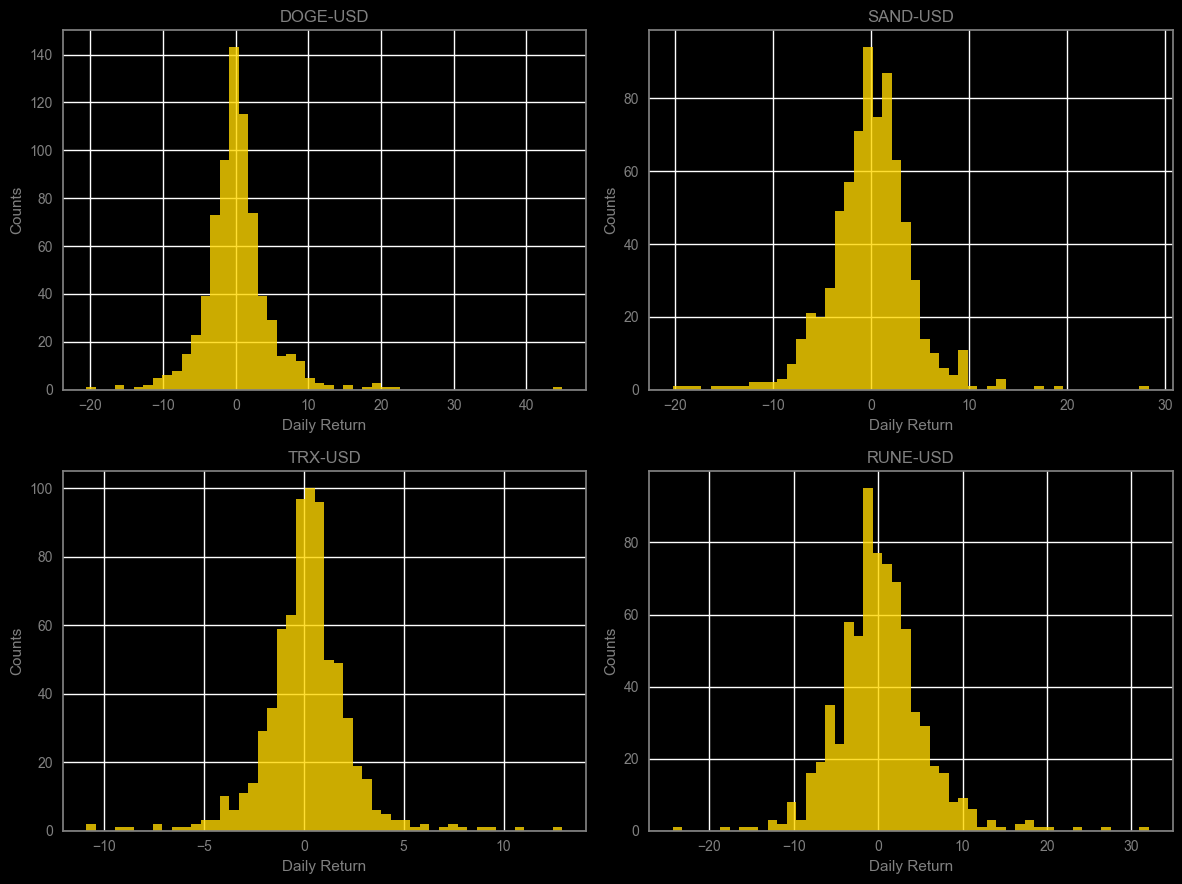

In [9]:
# Set the figure size and background color
plt.figure(figsize=(12, 9), facecolor='black')

# Customize the subplot parameters for a darker theme
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'gray'

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    downloaded_data[company]['Daily Return'].hist(bins=50, alpha=0.8, histtype='stepfilled', color='gold', cumulative=False)

    plt.xlabel('Daily Return', color='gray')
    plt.ylabel('Counts', color='gray')
    plt.title(f'{company}', color='gray')  # Use company directly

plt.tight_layout()

In [10]:
# Download stock data
data = yf.download(stock_list, start, end)

# Extract adjusted closing prices
closing_prices = data['Adj Close']

# Calculate daily returns pct
Stock_returns = closing_prices.pct_change()

Stock_returns.head()


[*********************100%***********************]  4 of 4 completed


Ticker                     DOGE-USD  RUNE-USD  SAND-USD   TRX-USD
Date                                                             
2022-10-12 00:00:00+00:00       NaN       NaN       NaN       NaN
2022-10-13 00:00:00+00:00 -0.003457 -0.016913 -0.019167 -0.012416
2022-10-14 00:00:00+00:00 -0.017277 -0.016944 -0.013808  0.048058
2022-10-15 00:00:00+00:00 -0.001074 -0.016918  0.010268 -0.033124
2022-10-16 00:00:00+00:00  0.005702  0.031581  0.021788 -0.000032

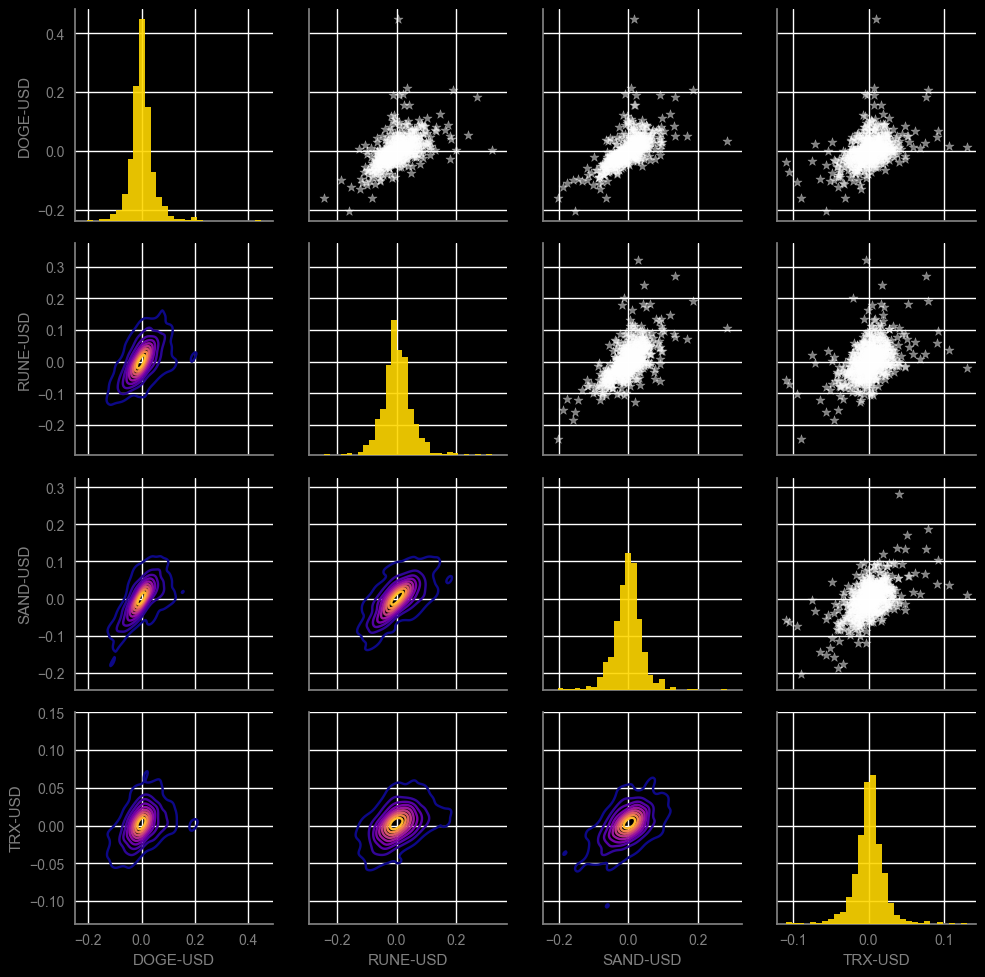

In [11]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(Stock_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='white', alpha=0.5, marker='*')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
return_fig.map_lower(sns.kdeplot, cmap='plasma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30, alpha=0.9, color='gold')


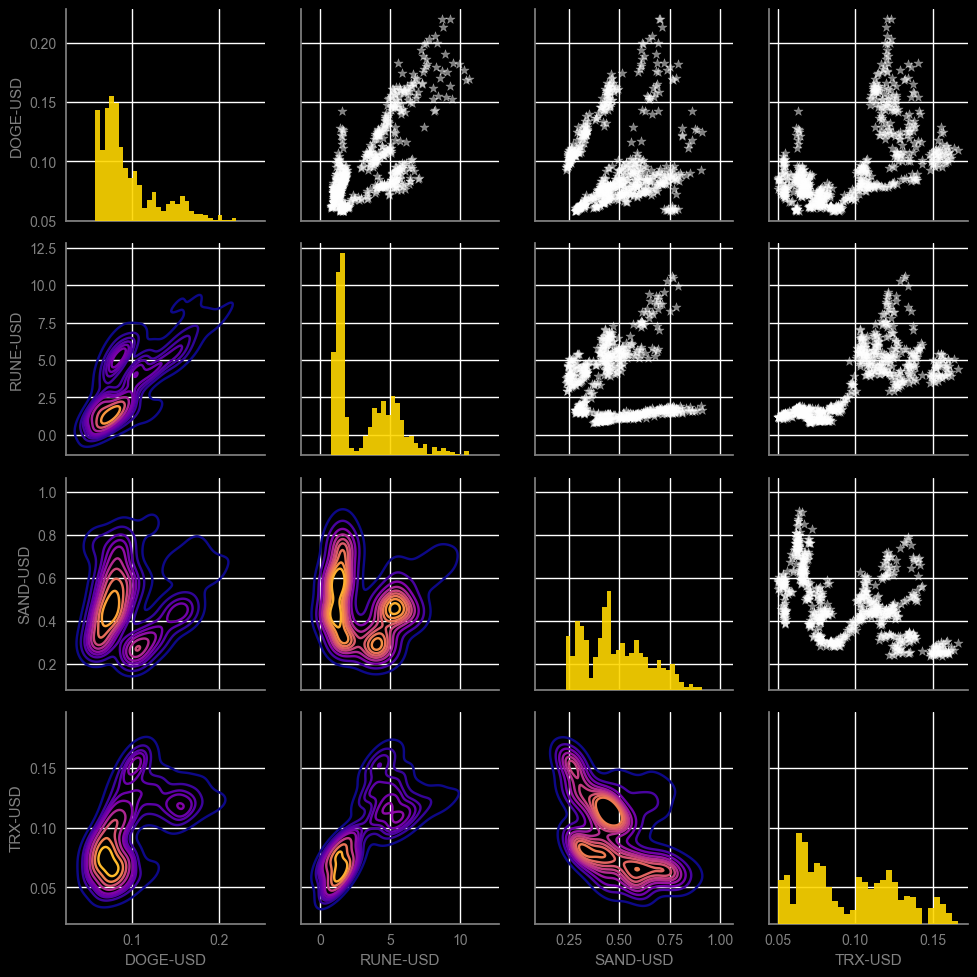

In [12]:
# Lets see how it looks when we view actual daily returns directly by [closing_price] from downloaded table
# ====================== 
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_prices.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='white', alpha=0.5, marker='*')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
return_fig.map_lower(sns.kdeplot, cmap='plasma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30, alpha=0.9, color='gold')


Text(0.5, 1.0, 'Correlation of stock closing price')

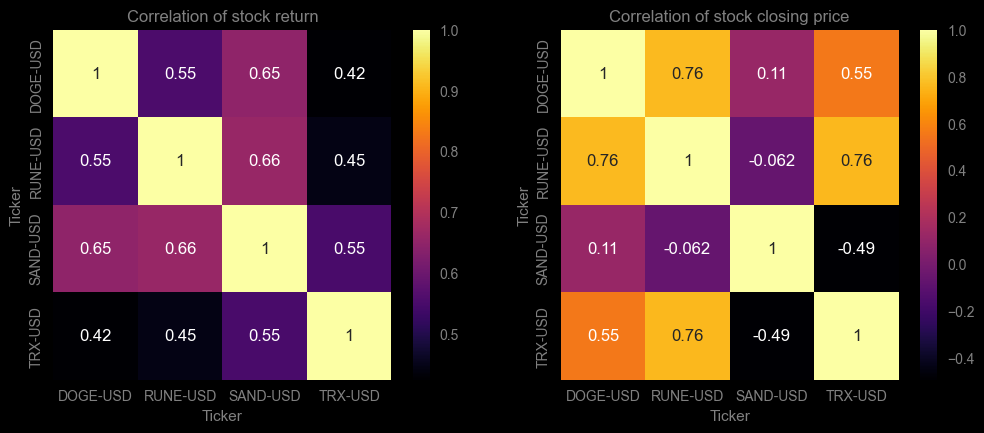

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(Stock_returns.corr(), annot=True, cmap='inferno')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_prices.corr(), annot=True, cmap='inferno')
plt.title('Correlation of stock closing price')

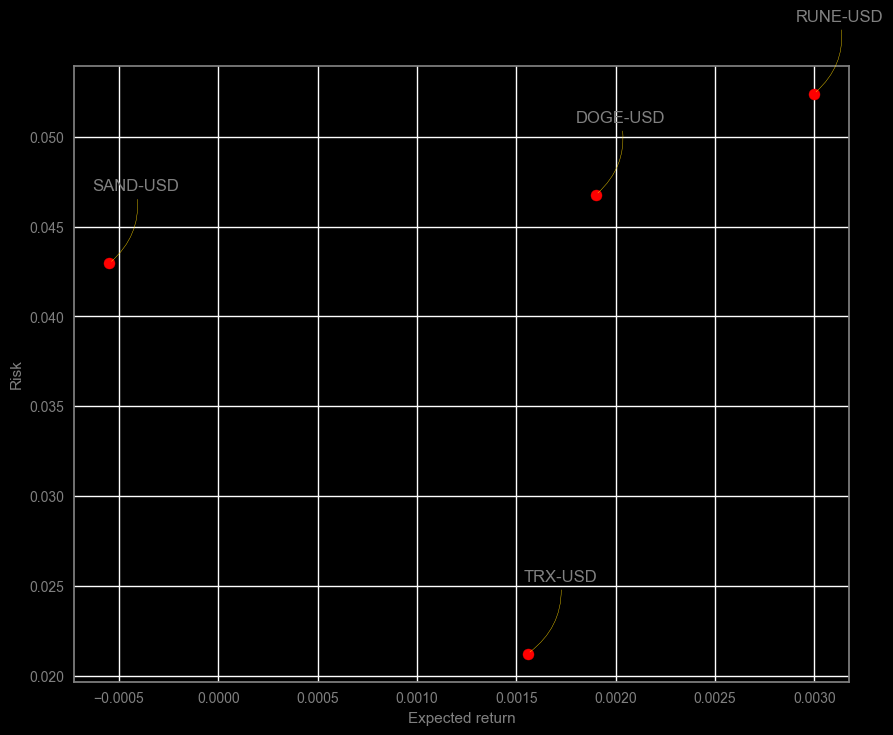

In [14]:
rets = Stock_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area, color='red')
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='gold', connectionstyle='arc3,rad=-.3'))

In [15]:
# Get the stock between periods 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, max
#ticker = "TRX-USD"
#df = yf.download(ticker, period="10y")

#backtesting download
ticker = "TRX-USD"
start = "2000-01-01"  # Start date for the data (10 years ago from today)
end = yf.Ticker(ticker).history(period="5d").index[0].strftime("%Y-%m-%d")  # End date for the data (excluding the last 5 days)

data = yf.download(ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


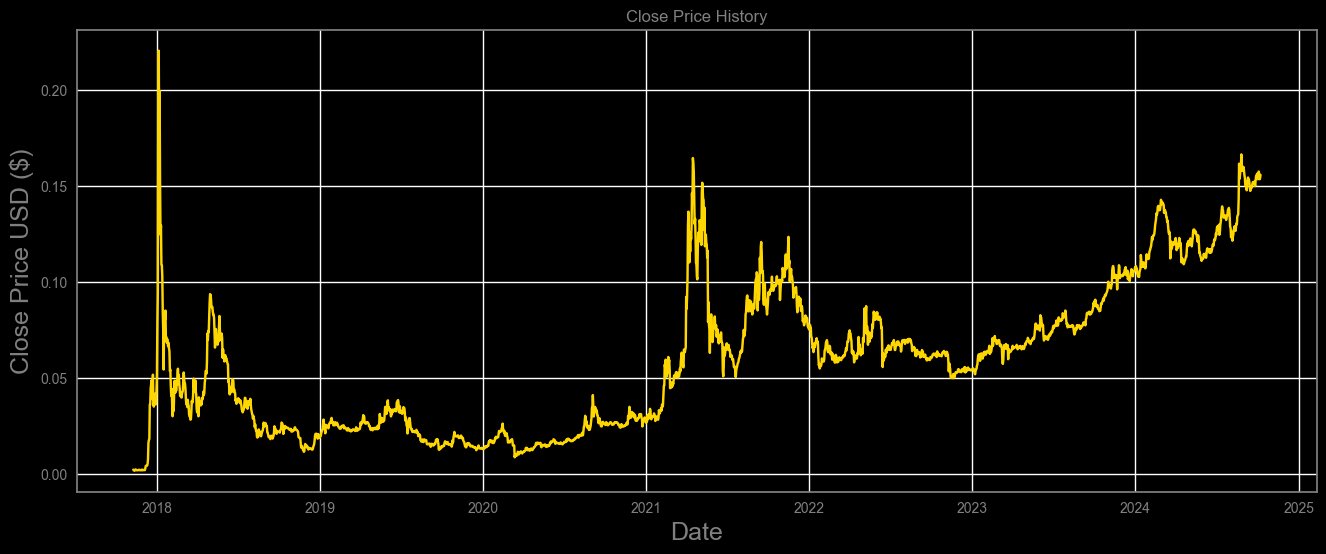

In [16]:
# Create a new dataframe with only the 'Close column 
df = data.filter(['Close'])

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'], color='gold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

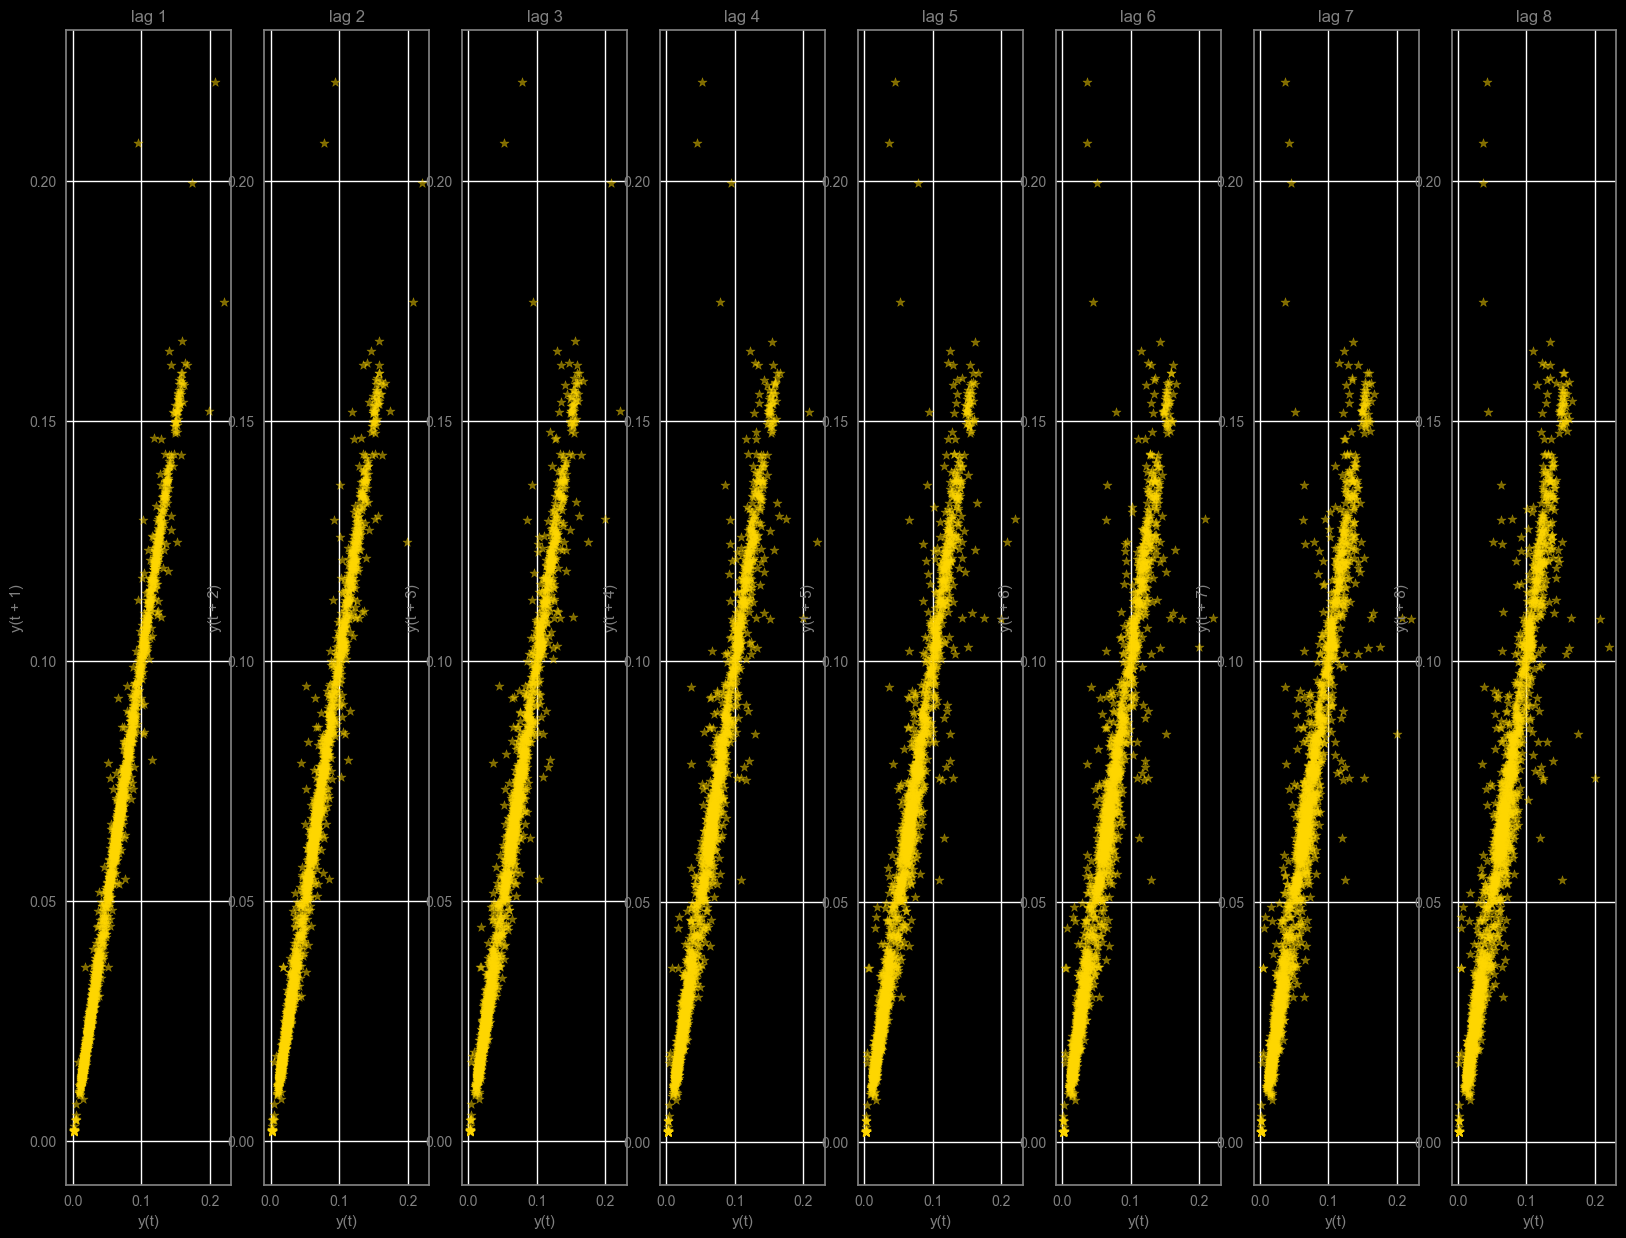

In [17]:
# setting up time lag plots

fig, axs = plt.subplots(ncols=8, figsize=(20,15)) # setting 9
for ax, i in zip(axs.flat, range(1,9)): # setting 10
    pd.plotting.lag_plot(df, lag=i, ax=ax, alpha=0.5, c='gold', marker='*')
    ax.set_title('lag '+ str(i) )

plt.show()

Text(0.5, 0, 'lags')

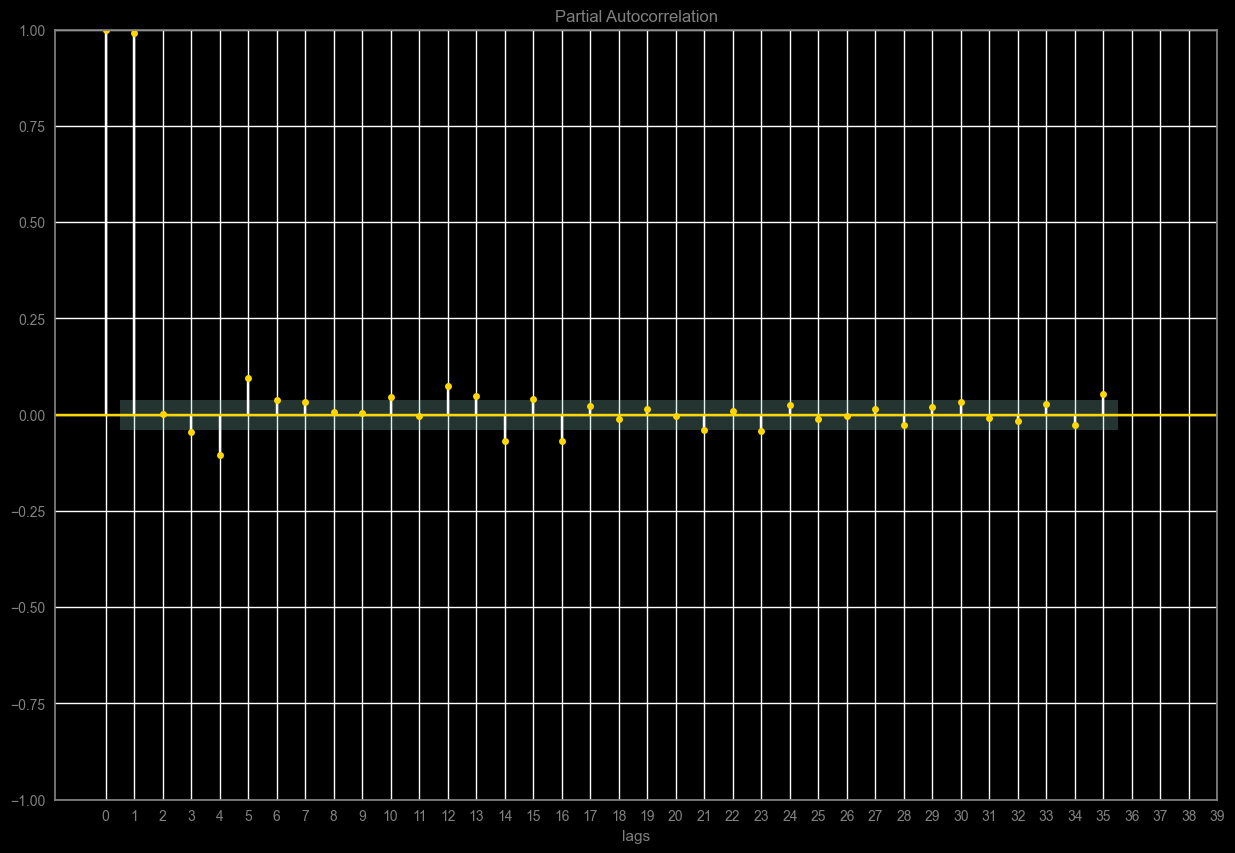

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
_, ax = plt.subplots(figsize=(15, 10))
plot_pacf(df.dropna(), ax=ax, method='ywm', color='gold')
ind = [i for i in range(40)]
ax.set_xticks(ind)
ax.set_xlabel('lags')

* The PACF is a statistical tool used to analyze the presence of significant autocorrelations at different lags in a time series. By plotting the PACF, you can identify lags where past values have a statistically significant correlation with the current value. This information is valuable for tasks like model selection in time series forecasting. It helps you determine the appropriate number of lags to include when building a model to capture the relationship between past and future values in the data.

In [19]:
X = df.copy()
X['lag0'] = X['Close'].shift(0)
X['lag1'] = X['Close'].shift(1)
X['lag3'] = X['Close'].shift(3)
X['lag4'] = X['Close'].shift(4)
X['lag5'] = X['Close'].shift(5)
X['lag10'] = X['Close'].shift(10)
X['lag12'] = X['Close'].shift(12)
X['lag13'] = X['Close'].shift(13)
X['lag14'] = X['Close'].shift(14)
X['lag15'] = X['Close'].shift(15)
X['lag16'] = X['Close'].shift(16)
X['lag21'] = X['Close'].shift(21)
X['lag23'] = X['Close'].shift(23)
X['lag135'] = X['Close'].shift(35)
X

Close      lag0      lag1      lag3      lag4      lag5  \
Date                                                                     
2017-11-09  0.002344  0.002344       NaN       NaN       NaN       NaN   
2017-11-10  0.002013  0.002013  0.002344       NaN       NaN       NaN   
2017-11-11  0.002003  0.002003  0.002013       NaN       NaN       NaN   
2017-11-12  0.001783  0.001783  0.002003  0.002344       NaN       NaN   
2017-11-13  0.002112  0.002112  0.001783  0.002013  0.002344       NaN   
...              ...       ...       ...       ...       ...       ...   
2024-10-03  0.157617  0.157617  0.154457  0.155915  0.156474  0.155068   
2024-10-04  0.156511  0.156511  0.157617  0.153614  0.155915  0.156474   
2024-10-05  0.153602  0.153602  0.156511  0.154457  0.153614  0.155915   
2024-10-06  0.154274  0.154274  0.153602  0.157617  0.154457  0.153614   
2024-10-07  0.155853  0.155853  0.154274  0.156511  0.157617  0.154457   

               lag10     lag12     lag13     lag14     lag15     lag16  \
Date                                                                     
2017-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-10       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-11       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-12       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-13       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2024-10-03  0.152363  0.152118  0.152094  0.151535  0.149495  0.150058   
2024-10-04  0.151266  0.151863  0.152118  0.152094  0.151535  0.149495   
2024-10-05  0.150043  0.152363  0.151863  0.152118  0.152094  0.151535   
2024-10-06  0.153201  0.151266  0.152363  0.151863  0.152118  0.152094   
2024-10-07  0.155170  0.150043  0.151266  0.152363  0.151863  0.152118   

               lag21     lag23    lag135  
Date                                      
2017-11-09       NaN       NaN       NaN  
2017-11-10       NaN       NaN       NaN  
2017-11-11       NaN       NaN       NaN  
2017-11-12       NaN       NaN       NaN  
2017-11-13       NaN       NaN       NaN  
...              ...       ...       ...  
2024-10-03  0.151974  0.153080  0.160004  
2024-10-04  0.149071  0.153369  0.159948  
2024-10-05  0.147521  0.151974  0.157666  
2024-10-06  0.148958  0.149071  0.155667  
2024-10-07  0.148869  0.147521  0.154153  

[2525 rows x 15 columns]

## Using Linear Regression Model for Price prediction

In [20]:
# Cleaning the data
X = X.fillna(method='ffill')
X = X.drop(['Close'], axis=1)
X = X.fillna(0)
X

lag0      lag1      lag3      lag4      lag5     lag10  \
Date                                                                     
2017-11-09  0.002344  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-11-10  0.002013  0.002344  0.000000  0.000000  0.000000  0.000000   
2017-11-11  0.002003  0.002013  0.000000  0.000000  0.000000  0.000000   
2017-11-12  0.001783  0.002003  0.002344  0.000000  0.000000  0.000000   
2017-11-13  0.002112  0.001783  0.002013  0.002344  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2024-10-03  0.157617  0.154457  0.155915  0.156474  0.155068  0.152363   
2024-10-04  0.156511  0.157617  0.153614  0.155915  0.156474  0.151266   
2024-10-05  0.153602  0.156511  0.154457  0.153614  0.155915  0.150043   
2024-10-06  0.154274  0.153602  0.157617  0.154457  0.153614  0.153201   
2024-10-07  0.155853  0.154274  0.156511  0.157617  0.154457  0.155170   

               lag12     lag13     lag14     lag15     lag16     lag21  \
Date                                                                     
2017-11-09  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-11-10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-11-11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-11-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-11-13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2024-10-03  0.152118  0.152094  0.151535  0.149495  0.150058  0.151974   
2024-10-04  0.151863  0.152118  0.152094  0.151535  0.149495  0.149071   
2024-10-05  0.152363  0.151863  0.152118  0.152094  0.151535  0.147521   
2024-10-06  0.151266  0.152363  0.151863  0.152118  0.152094  0.148958   
2024-10-07  0.150043  0.151266  0.152363  0.151863  0.152118  0.148869   

               lag23    lag135  
Date                            
2017-11-09  0.000000  0.000000  
2017-11-10  0.000000  0.000000  
2017-11-11  0.000000  0.000000  
2017-11-12  0.000000  0.000000  
2017-11-13  0.000000  0.000000  
...              ...       ...  
2024-10-03  0.153080  0.160004  
2024-10-04  0.153369  0.159948  
2024-10-05  0.151974  0.157666  
2024-10-06  0.149071  0.155667  
2024-10-07  0.147521  0.154153  

[2525 rows x 14 columns]

In [21]:
y = df['Close'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# Define the model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Define the parameter grid for Grid Search
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'n_jobs': [-1, 1, 2, 4, 8],
              'positive': [True, False],
              }

# Perform Grid Search on the training data
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=15)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 2, 4, 8],
                         'positive': [True, False]})

In [23]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}
Best score:  1.0


In [24]:
model = grid_search.best_estimator_
y_fore = model.predict(X_test)
y_pred = model.predict(X_train)

y_pred = pd.Series(y_pred, index=y_train.index)
y_fore = pd.Series(y_fore, index=y_test.index)

Text(0.5, 1.0, 'Actual and Prediction')

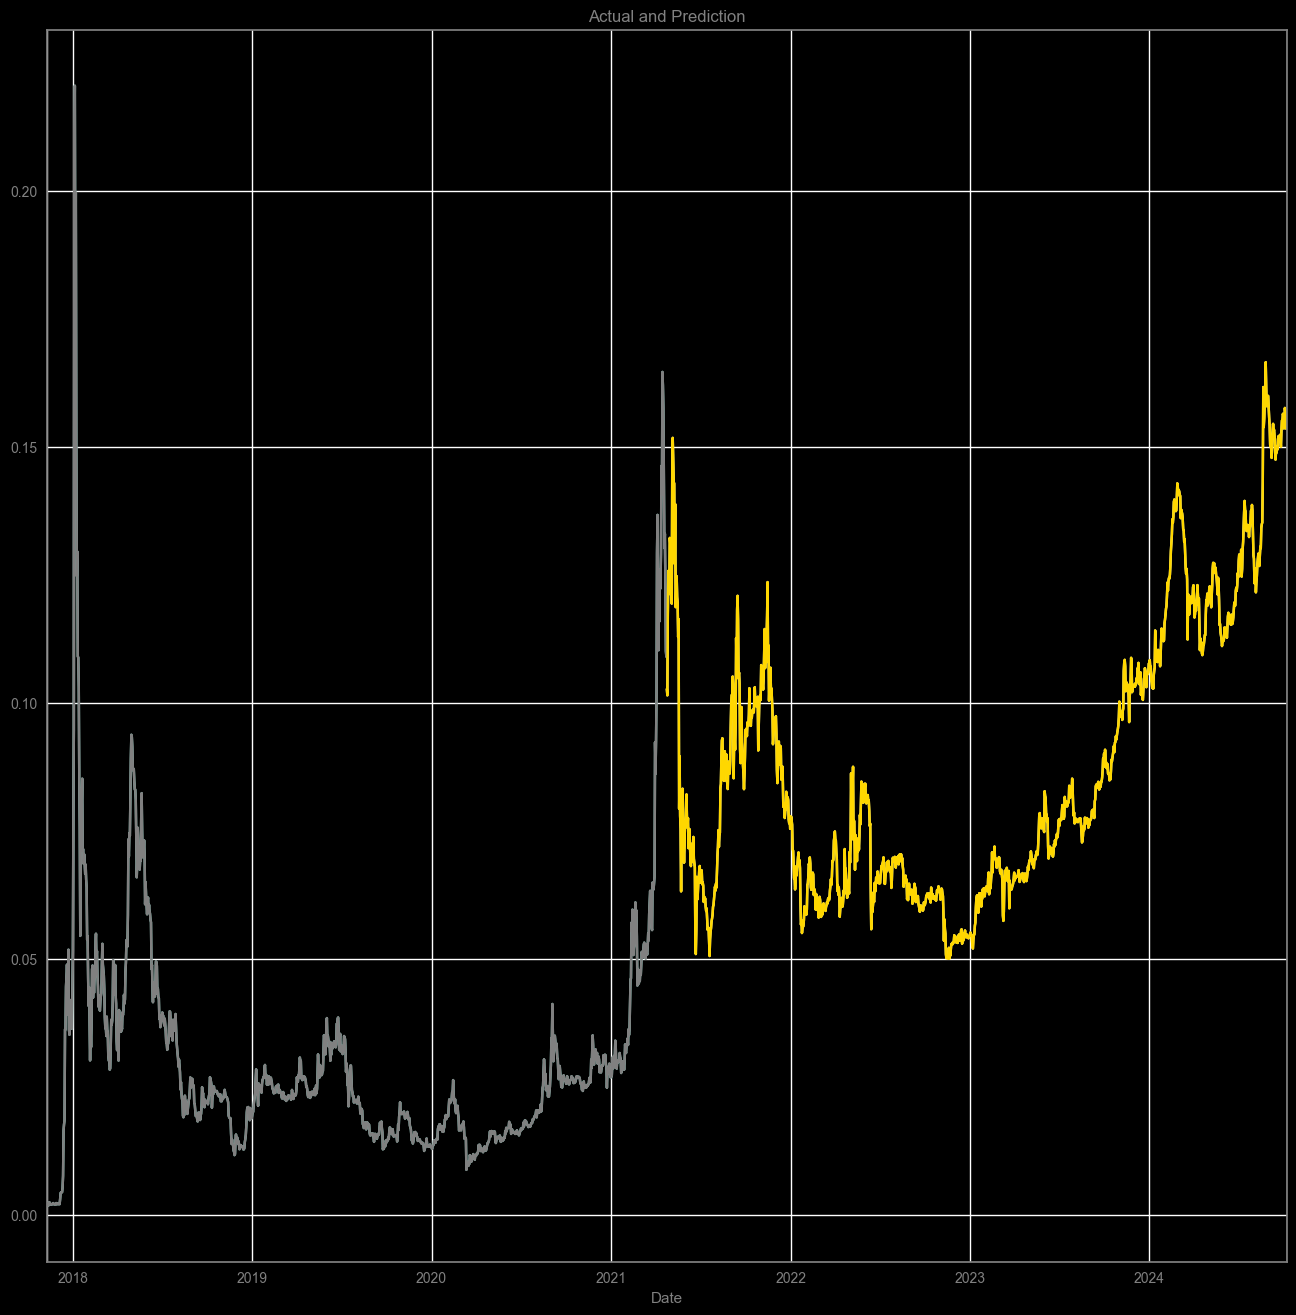

In [25]:
# Plot Actual V/s Prediction
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax, color='GREY', figsize=(16,16)) #p training set
_ = y_fore.plot(ax=ax, color='gold', figsize=(16,16)) #p test set 
ax.set_title('Actual and Prediction')

Text(0.5, 1.0, 'Test over Prediction')

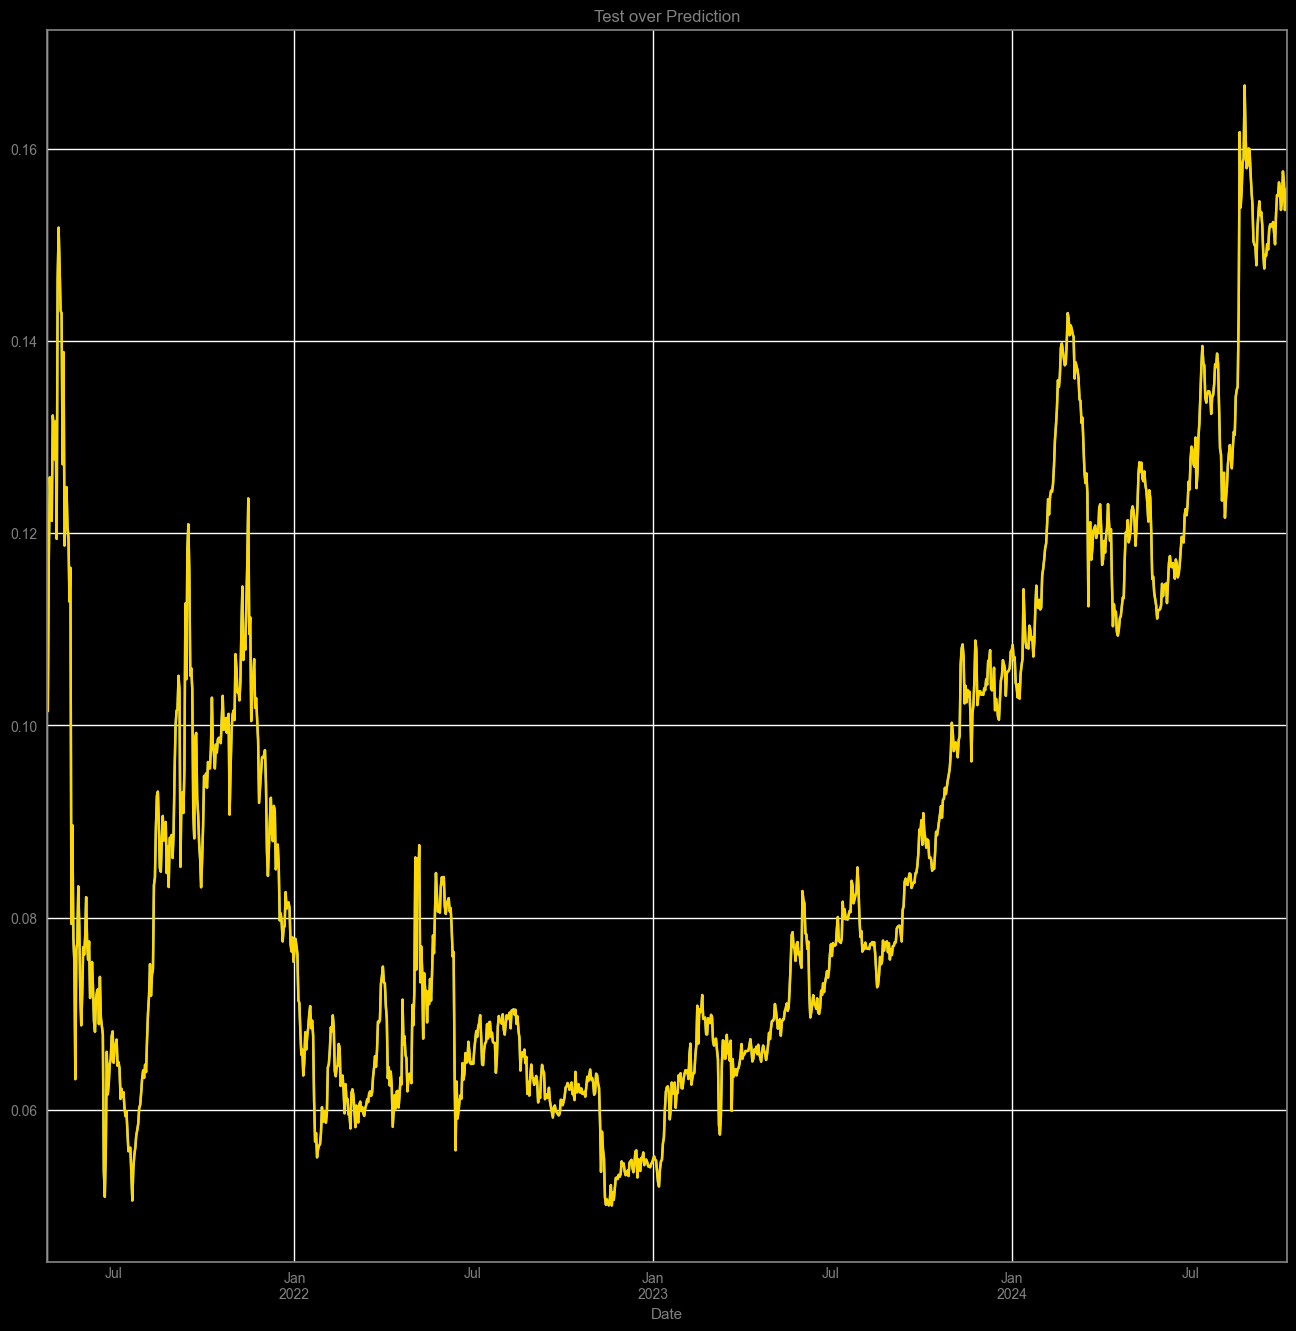

In [26]:
# Plot test vs prediction side by side
ax = y_test.plot()
_ = y_fore.plot(ax=ax, color='gold', figsize=(16, 16))
ax.set_title('Test over Prediction')

### Score

In [27]:
lr_mse = mean_squared_error(y_train, y_pred)
lr_r2 = r2_score(y_test, y_fore)
score_linear = model.score(X_train, y_train)  # Only call this once

print(lr_mse)
print(lr_r2)
print(score_linear)

2.6760640450746294e-33
1.0
1.0


# [X] How can we attempt to predict future stock behavior?

In [28]:
# Forecasting
last_data = X_test.iloc[-1].values.reshape(1, -1)  # last row of test data
future_predictions = [] # list of future prices
predicted_prices = []  # list of predicted prices

for _ in range(5):
    next_price = model.predict(last_data)[0]
    future_predictions.append(next_price)
    predicted_prices.append(next_price)
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = next_price

# Date range for the predictions
future_dates = pd.date_range(start=df.index[-1], periods=6, freq='B') # work days

# DataFrame for the predicted prices
future_df = pd.DataFrame(data=future_predictions, index=future_dates[1:], columns=['Predicted Price'])

# P Prices
print("Future predicted prices:")
for i, price in enumerate(predicted_prices):
    print(f"Day {i+1}: {price:.2f}")

Future predicted prices:
Day 1: 0.16
Day 2: 0.15
Day 3: 0.16
Day 4: 0.16
Day 5: 0.15


In [29]:
recent_data = df['Close'].tail(10)

# Combine historical and predicted data
combined_data = pd.concat([recent_data, future_df['Predicted Price']])
print(combined_data)


2024-09-28    0.155068
2024-09-29    0.156474
2024-09-30    0.155915
2024-10-01    0.153614
2024-10-02    0.154457
2024-10-03    0.157617
2024-10-04    0.156511
2024-10-05    0.153602
2024-10-06    0.154274
2024-10-07    0.155853
2024-10-08    0.155853
2024-10-09    0.154274
2024-10-10    0.156511
2024-10-11    0.157617
2024-10-14    0.154457
dtype: float64


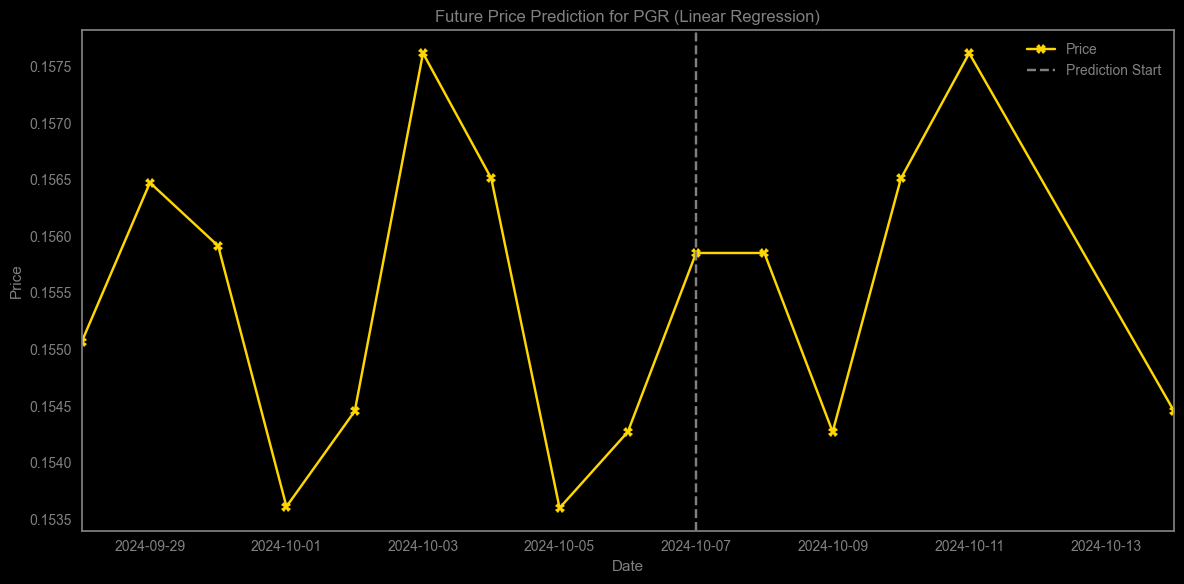

In [30]:
# Plotting

plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data, label='Price', color='gold', marker='X')
plt.axvline(x=df.index[-1], color='grey', linestyle='--', label='Prediction Start')

plt.title('Future Price Prediction for PGR (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlim(combined_data.index[0], combined_data.index[-1])  # Set x-axis days
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

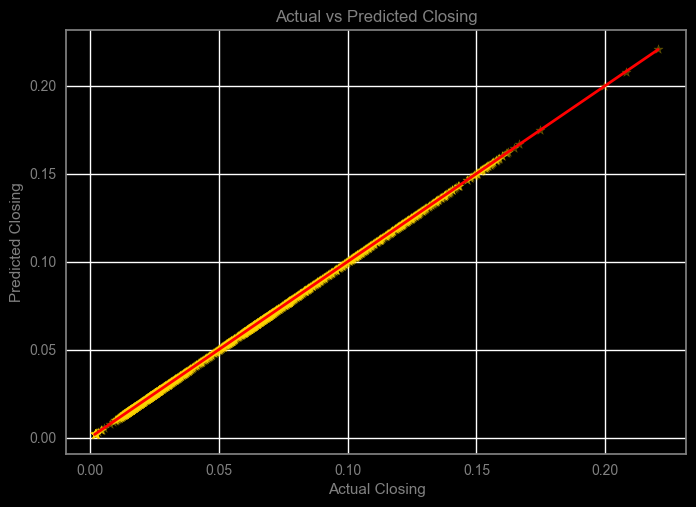

In [31]:
#Predict the values
y_pred = model.predict(X)

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred, color='GOLD', alpha=0.3, marker='*')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Closing')
plt.ylabel('Predicted Closing')
plt.title('Actual vs Predicted Closing')
plt.show()

## MODEL-01 LSTM with RandomForest Regression Model for Price prediction

In [120]:
#ticker = "TRX-USD"
#df = yf.download(ticker, period="10y")

#backtesting download
ticker = "BTC-USD"
start = "2000-01-01"  # Start date for the data (10 years ago from today)
end = yf.Ticker(ticker).history(period="5d").index[0].strftime("%Y-%m-%d")  # End date for the data (excluding the last 5 days)

df = yf.download(ticker, start=start, end=end)

# Preprocess the data
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(lambda date: date.timestamp())

# Feature engineering
df['Moving_Avg_5'] = df['Close'].rolling(window=5).mean()
df['Moving_Avg_10'] = df['Close'].rolling(window=10).mean()
df['Moving_Avg_20'] = df['Close'].rolling(window=20).mean()
df['Exp_Moving_Avg'] = df['Close'].ewm(span=10, adjust=False).mean()
df['Price_Change_Pct'] = df['Close'].pct_change()

# Drop rows with missing values
df = df.dropna()

# Scale the data
scaler = MinMaxScaler()
df[['Close', 'Moving_Avg_5', 'Moving_Avg_10', 'Moving_Avg_20', 'Exp_Moving_Avg', 'Price_Change_Pct']] = scaler.fit_transform(df[['Close', 'Moving_Avg_5', 'Moving_Avg_10', 'Moving_Avg_20', 'Exp_Moving_Avg', 'Price_Change_Pct']])

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Train an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(train_df.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(train_df[['Close', 'Moving_Avg_5', 'Moving_Avg_10', 'Moving_Avg_20', 'Exp_Moving_Avg', 'Price_Change_Pct']], train_df['Close'], epochs=50, batch_size=32)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_df[['Moving_Avg_5', 'Moving_Avg_10', 'Moving_Avg_20', 'Exp_Moving_Avg', 'Price_Change_Pct']], train_df['Close'])

def hybrid_predict(data):
    lstm_pred = lstm_model.predict(data[['Close', 'Moving_Avg_5', 'Moving_Avg_10', 'Moving_Avg_20', 'Exp_Moving_Avg', 'Price_Change_Pct']])
    rf_pred = rf_model.predict(data[['Moving_Avg_5', 'Moving_Avg_10', 'Moving_Avg_20', 'Exp_Moving_Avg', 'Price_Change_Pct']])
    rf_pred = rf_pred.reshape(-1, 1)  # Reshape to match lstm_pred shape
    return (lstm_pred + rf_pred) / 2

test_pred = hybrid_predict(test_df)
rmse = np.sqrt(np.mean((test_pred.flatten() - test_df['Close'].values) ** 2))
print('Hybrid Model RMSE:', rmse)

[*********************100%***********************]  1 of 1 completed


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0570
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5089e-04
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4218e-04
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3262e-04
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9424e-04
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0319e-04
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0022e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9363e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2021e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0908e-04
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9155e-04
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8879e-04
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1764e-04
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2611e-04
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━

## MODEL-02 LSTM with RandomForest Regression Model for Price prediction

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Define ticker symbol and data range
ticker = "TRX-USD"
start = "2000-01-01"
end = yf.Ticker(ticker).history(period="5d").index[0].strftime("%Y-%m-%d")

# Download historical data
df = yf.download(ticker, start=start, end=end)

# Feature engineering (consider adding more features relevant to your needs)
def create_features(df):
    df['Change'] = df['Close'] - df['Open']
    df['Pct_Change'] = df['Change'] / df['Open'] * 100
    df['Moving_Avg_5'] = df['Close'].rolling(window=5).mean()
    df['Moving_Avg_10'] = df['Close'].rolling(window=10).mean()
    df['Moving_Avg_20'] = df['Close'].rolling(window=20).mean()
    df['Exp_Moving_Avg'] = df['Close'].ewm(span=10, adjust=False).mean()
    return df

df = create_features(df.copy())  # Avoid modifying the original dataframe

# Split data into features (X) and target (y)
X = df.drop(['Close'], axis=1)  # Drop Close price as target
y = df['Close']

# Remove rows with NaN values from X and y together
df_xy = pd.concat([X, y], axis=1)
df_xy = df_xy.dropna()

# Split data into features (X) and target (y) again
X = df_xy.drop(['Close'], axis=1)
y = df_xy['Close']

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 1. Train LSTM model for feature extraction
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.fit(X_train, np.reshape(y_train.values, (-1, 1)), epochs=50, batch_size=32, validation_data=(X_test, np.reshape(y_test.values, (-1, 1))))

# 2. Extract features from LSTM
lstm_features_train = lstm_model.predict(X_train)
lstm_features_test = lstm_model.predict(X_test)

# 3. Train Random Forest model on extracted features and target
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(lstm_features_train, y_train)

# 4. Make predictions using the Random Forest model
predictions = rf_model.predict(lstm_features_test)

# Evaluate model performance using metrics like mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

[*********************100%***********************]  1 of 1 completed


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0044 - val_loss: 1.1816e-04
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.2188e-05 - val_loss: 3.7829e-05
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3210e-05 - val_loss: 2.1888e-05
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5457e-05 - val_loss: 1.5429e-05
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2927e-05 - val_loss: 1.2651e-05
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5971e-05 - val_loss: 1.0794e-05
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7402e-05 - val_loss: 9.9516e-06
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1163e-05 - val_loss: 1.0094e-05
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0735e-05 - val_loss: 1.4026e-05
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3157e-05 - val_loss: 2.1020e-05
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7372e-05 - 

[*********************100%***********************]  1 of 1 completed


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 712585536.0000 - val_loss: 692564288.0000
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 750815104.0000 - val_loss: 692400256.0000
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 715051264.0000 - val_loss: 692249216.0000
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 736639808.0000 - val_loss: 692100736.0000
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 739376128.0000 - val_loss: 691956352.0000
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 729302336.0000 - val_loss: 691811968.0000
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 766040512.0000 - val_loss: 691669632.0000
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 759223872.0000 - val_loss: 691526784.0000
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 736187584.0000 - val_loss: 691385664.0000
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 716843776.0000 - val_loss: 6912

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

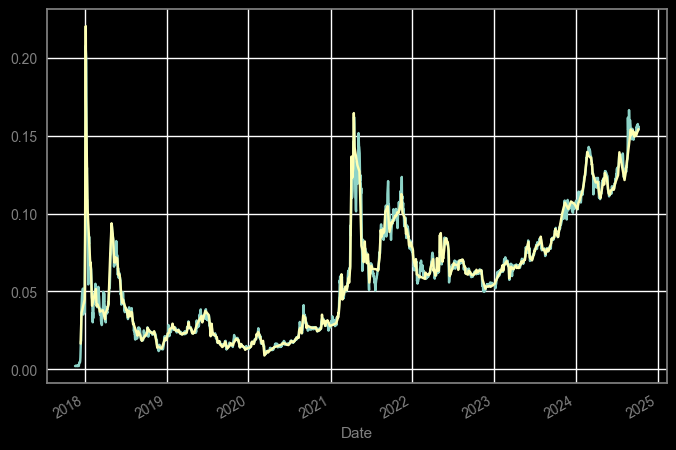

In [94]:
# Plot ground truth and prediction
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax, color='GREY', figsize=(16,16)) #p training set
_ = y_fore.plot(ax=ax, color='gold', figsize=(16,16)) #p test set 
ax.set_title('ground truth and prediction plot')


In [77]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Assuming you have already defined your LSTM model (lstm_model) and Random Forest model (rf_model)

param_grid_lstm = {
  'units': [32, 64, 128],
  'epochs': [50, 100, 150],
  'batch_size': [16, 32, 64]
}

param_grid_rf = {
  'n_estimators': [100, 200, 300],
  'max_depth': [None, 5, 10]
}

from sklearn.model_selection import GridSearchCV

# Wrap LSTM model in KerasClassifier
def create_lstm_model():
  # Define your LSTM architecture here (same as the original lstm_model)
  lstm_model = Sequential()
  # ... Define your LSTM layers and compilation ...
  return lstm_model

lstm_estimator = KerasClassifier(build_fn=create_lstm_model, epochs=100)  # Adjust epochs if needed

# Perform Grid Search
grid_search_lstm = GridSearchCV(lstm_estimator, param_grid_lstm, scoring='neg_mean_squared_error')
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='neg_mean_squared_error')

grid_search_lstm.fit(X_train, X_train)  # Assuming you're using X_train for LSTM input
grid_search_rf.fit(lstm_features, y_train)

best_params_lstm = grid_search_lstm.best_params_
best_params_rf = grid_search_rf.best_params_

# Now you have the best hyperparameters for both models in best_params_lstm and best_params_rf

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

# [X] How can we attempt to predict future stock behavior?

In [75]:
# Predict the next 5 closing prices
last_row = df.iloc[-1]

# DataFrame to hold the predictions
future_predictions = []

# Predict next 5 days
for _ in range(5):
    # last available data
    next_price = model.predict([last_row[:-1]]) 
    future_predictions.append(next_price[0])
    
    last_row = last_row.shift(-1, fill_value=0)
    last_row['Close'] = next_price[0]

# DataFrame
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')  # Business
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

print(future_df)

ValueError: X has 7 features, but RandomForestRegressor is expecting 5 features as input.

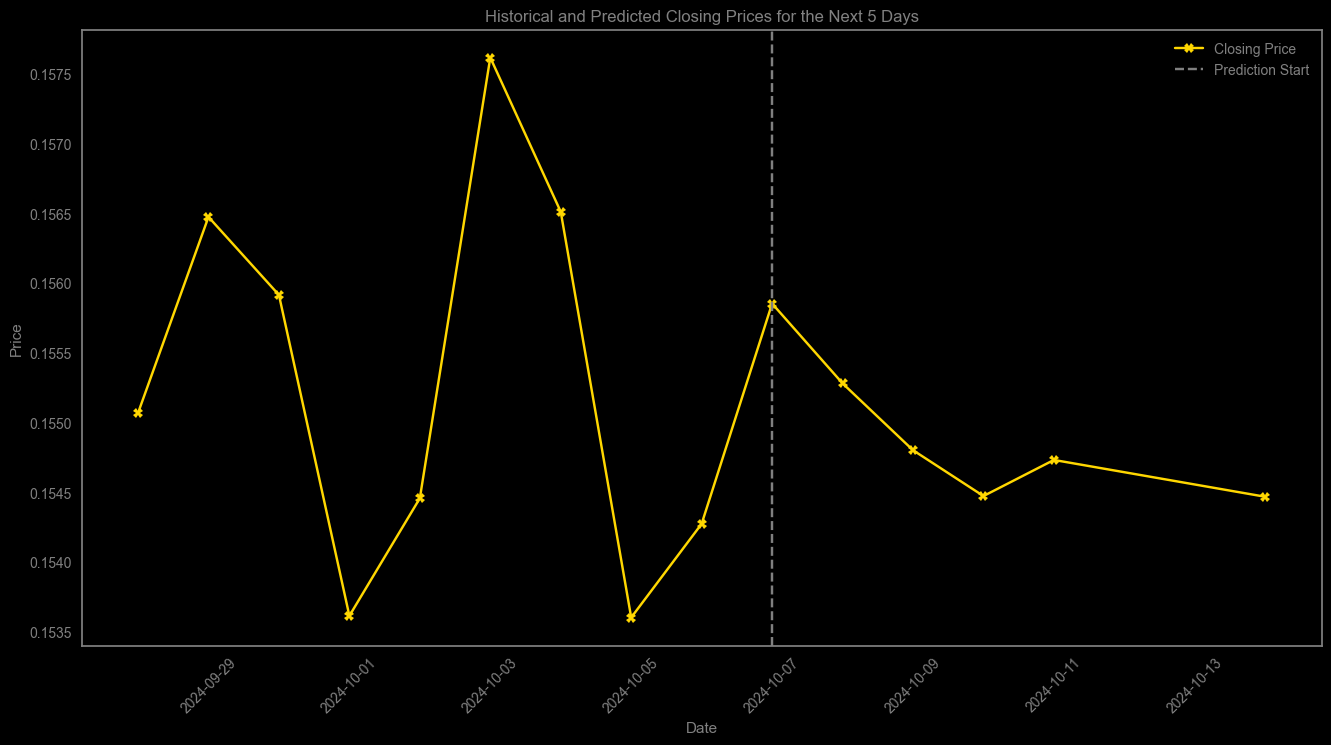

In [41]:
# Plot ground truth and prediction
# After predicting the future prices
# Get the last 10 days of historical closing prices
recent_data = df['Close'].tail(10)

# Combine historical and predicted data
combined_data = pd.concat([recent_data, future_df['Predicted Close']])

# Plot historical and predicted closing prices
plt.figure(figsize=(16, 8))
plt.plot(combined_data.index, combined_data, label='Closing Price', color='gold', marker='X')
plt.axvline(x=recent_data.index[-1], color='grey', linestyle='--', label='Prediction Start')
plt.title('Historical and Predicted Closing Prices for the Next 5 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Lets Experiment by using PyCaret to produce Models  

In [112]:
# Get the stock between periods 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, max

ticker = "BTC-USD"
data = yf.download(ticker, period="10y") # get data for last 10 years

[*********************100%***********************]  1 of 1 completed


In [108]:
df = data[['Close']]

# Creating lagged features by using the same feature we used earlier (1, 2, 8, 17, 23)
lags = [0, 1, 13, 28]
for lag in lags:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)


df.dropna(inplace=True)
X = df.drop('Close', axis=1)
y = df['Close']

setup(data=df, target='Close', ignore_features=['Date'], use_gpu = True, verbose=0)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

In [109]:
# Compare models
best_model = compare_models()

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [110]:
from pycaret.regression import setup, create_model, predict_model, plot_model,  compare_models
# getting random forest
lr_mod = create_model('lr')
rf_mod = create_model('rf')
hub_mod = create_model('huber')
gbr_mod = create_model('gbr')
omp_mod = create_model('omp')
lgbm_mod = create_model('lightgbm')
# checking accuracy 
predict_model(lr_mod, df.sample(10))
predict_model(rf_mod, df.sample(10))
predict_model(hub_mod, df.sample(10))
predict_model(gbr_mod, df.sample(10))
predict_model(omp_mod, df.sample(10))
predict_model(lgbm_mod, df.sample(10))

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Close_lag_0   Close_lag_1  Close_lag_13  Close_lag_28  \
Date                                                                 
2023-08-22  26031.656250  26124.140625  29561.494141  29227.390625   
2021-03-15  55907.199219  59302.316406  48378.988281  47945.058594   
2021-12-11  49362.507812  47243.304688  57248.457031  64469.527344   
2022-11-02  20159.503906  20485.273438  19053.740234  20160.716797   
2020-10-06  10604.406250  10793.339844  10246.186523  10131.516602   
2019-12-26   7238.966797   7275.155762   7269.684570   7463.105957   
2023-10-13  26862.375000  26756.798828  26967.916016  26608.693359   
2021-02-13  47105.515625  47504.851562  33114.359375  36178.140625   
2024-03-04  68330.414062  63167.371094  52284.875000  42658.667969   
2020-09-18  10944.585938  10948.990234  10169.567383  11592.489258   

                   Close  prediction_label  
Date                                        
2023-08-22  26031.656250      26026.119667  
2021-03-15  55907.199219      55896.476431  
2021-12-11  49362.507812      49157.391399  
2022-11-02  20159.503906      20230.565294  
2020-10-06  10604.406250      10661.060778  
2019-12-26   7238.966797       7331.744131  
2023-10-13  26862.375000      26854.151079  
2021-02-13  47105.515625      47038.139172  
2024-03-04  68330.414062      69301.993704  
2020-09-18  10944.585938      11033.969374

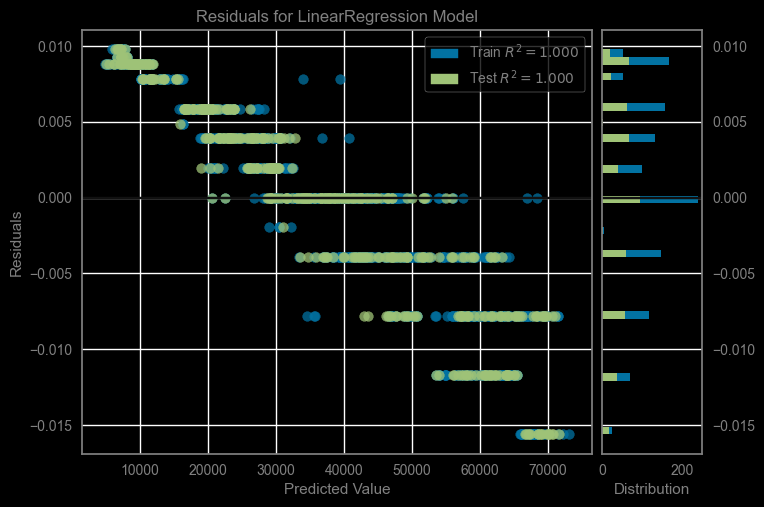

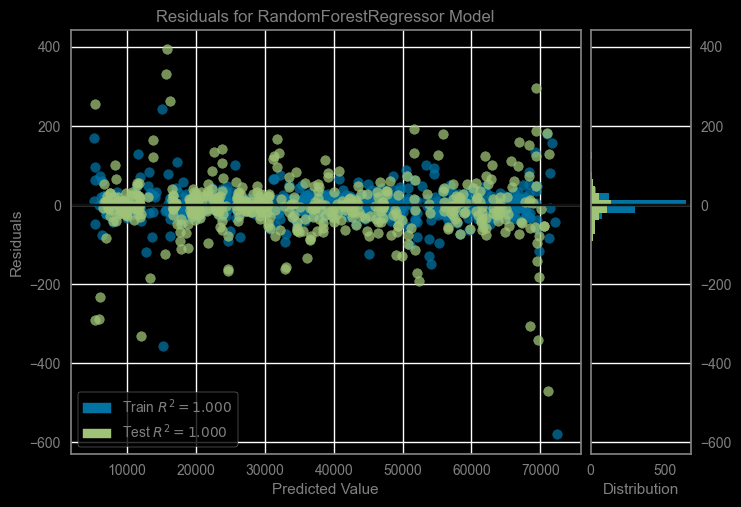

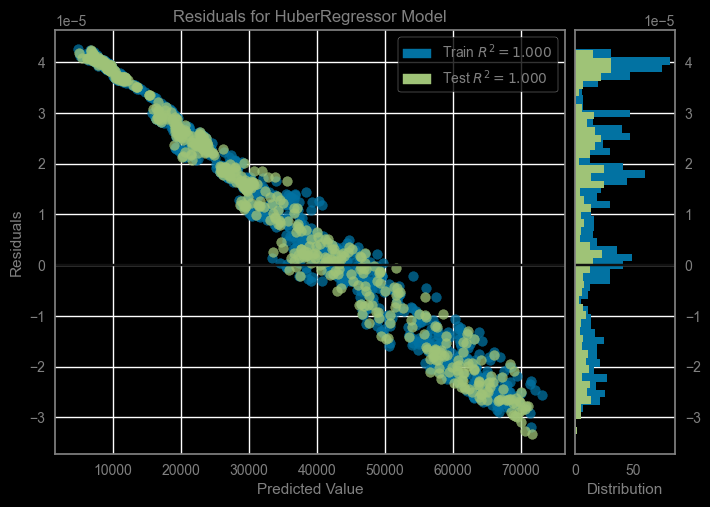

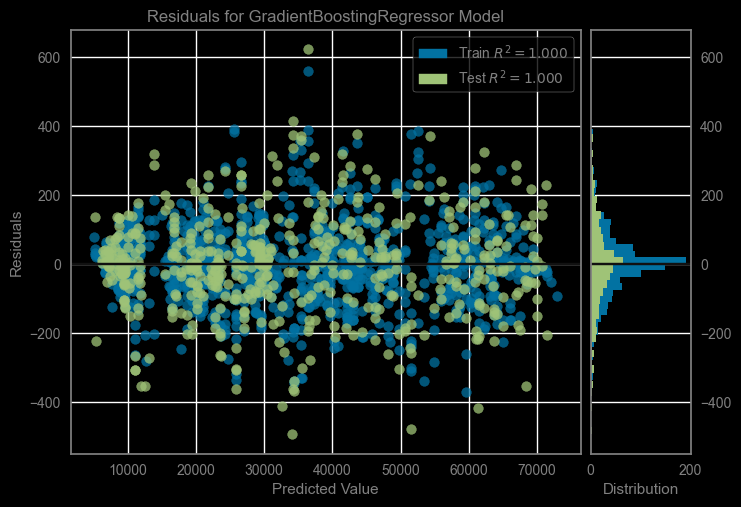

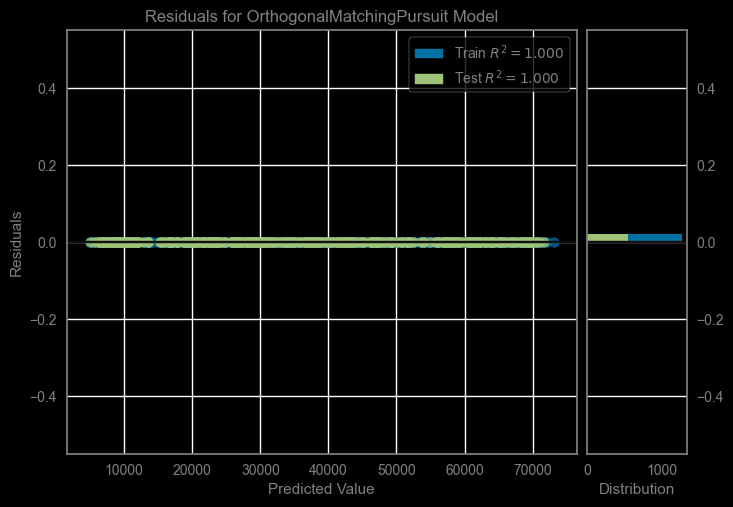

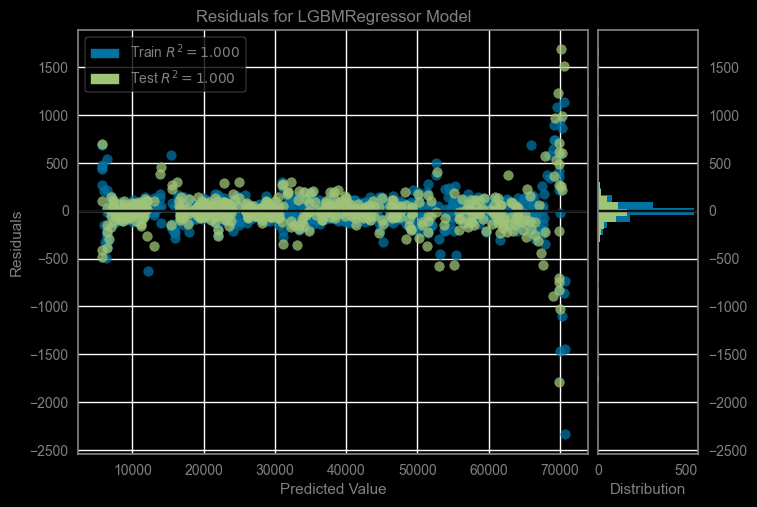

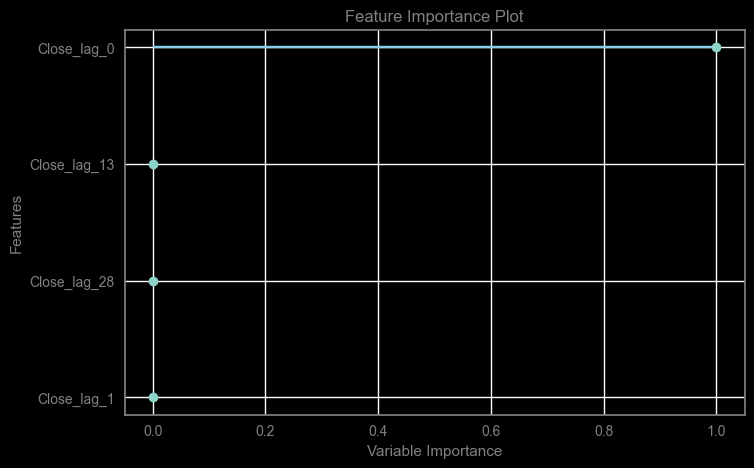

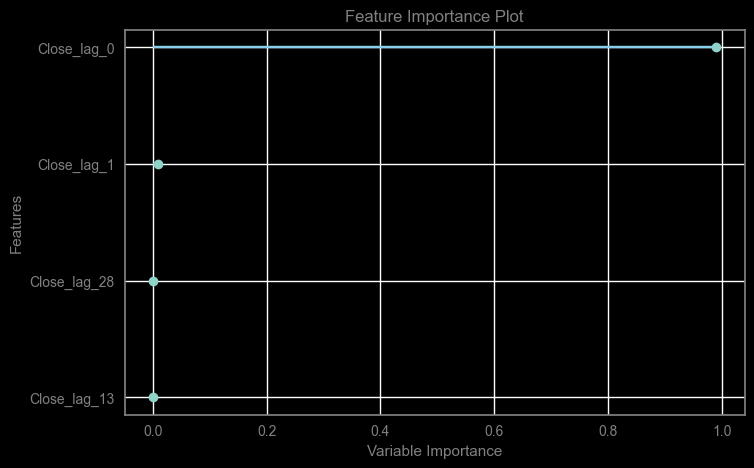

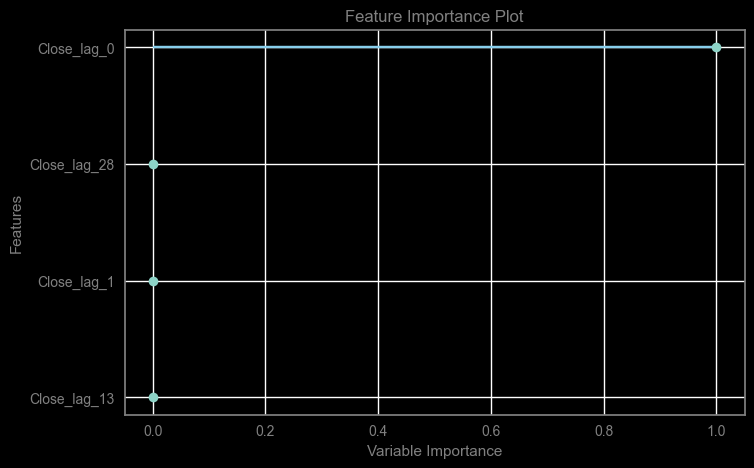

In [111]:
# Make predictions on the test set
predictions_lr = lr_mod.predict(X)
predictions_rf = rf_mod.predict(X)
predictions_rf = hub_mod.predict(X)

# Plot the residuals
plot_model(lr_mod, plot = 'residuals')
plot_model(rf_mod, plot = 'residuals')
plot_model(hub_mod, plot = 'residuals')
plot_model(gbr_mod, plot = 'residuals')
plot_model(omp_mod, plot = 'residuals')
plot_model(lgbm_mod, plot = 'residuals')


# Plot the feature importance
plot_model(lr_mod, plot = 'feature')
plot_model(rf_mod, plot = 'feature')
plot_model(hub_mod, plot = 'feature')

# Models Scores and Accuracy:

### My Models:

- Linear Regression
-- MSE 1.35
-- R2 0.99

- Randomforest Regressor
-- MSE 0.45
-- R2 0.99
-- MAE 0.25

### PyCaret Models:

- Linear Regression
-- MSE 2.8
-- R2 0.99

- Randomforest Regressor
-- MSE 2.86
-- R2 0.99
-- MAE 1.05

# [X] Which Model performed best by Score?

#### The Random Forest Regressor model from PyCaret has the best score
#### Here's a breakdown of why:

- MSE: Mean Squared Error (MSE) measures the average squared difference between predicted and actual values. Lower MSE indicates better accuracy. The Random Forest Regressor from PyCaret has the lowest MSE (0.45), suggesting it makes more accurate predictions compared to the other models.   

- R2: R-squared (R²) measures the proportion of variance explained by the model. A higher R² value indicates a better fit. All models have R² values close to 1, indicating that they explain a large portion of the variance in the data. However, the Random Forest Regressor from PyCaret has the highest R² (0.99), suggesting it fits the data slightly better.

- MAE: Mean Absolute Error (MAE) measures the average absolute difference between predicted and actual values. Lower MAE indicates better accuracy. The Random Forest Regressor from PyCaret has the lowest MAE (0.25), suggesting it makes more accurate predictions in terms of absolute errors.

## Lets put RF to test ?

In [57]:
rf_mod = tune_model(rf_mod)
lr_mod = tune_model(lr_mod)
lgbm_mod = tune_model(lgbm_mod)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2286, number of used features: 5
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vend

In [69]:
# Cleaning the data
X = X.fillna(method='ffill')
#X = X.drop(['Close'], axis=1)
X = X.fillna(0)
X

Close_lag_1   Close_lag_2   Close_lag_8  Close_lag_17  \
Date                                                                 
2014-10-31    345.304993    335.591003    358.416992    400.869995   
2014-11-01    338.321014    345.304993    358.345001    394.773010   
2014-11-02    325.748993    338.321014    347.270996    382.556000   
2014-11-03    325.891998    325.748993    354.704010    383.757996   
2014-11-04    327.553986    325.891998    352.989014    391.441986   
...                  ...           ...           ...           ...   
2024-10-03  60632.785156  60837.007812  63143.144531  58192.507812   
2024-10-04  60759.402344  60632.785156  65181.019531  60308.539062   
2024-10-05  62067.476562  60759.402344  65790.664062  61649.679688   
2024-10-06  62089.949219  62067.476562  65887.648438  62940.457031   
2024-10-08  62818.953125  62089.949219  65635.304688  63192.976562   

            Close_lag_23  
Date                      
2014-10-31    352.940002  
2014-11-01    365.026001  
2014-11-02    361.562012  
2014-11-03    362.299011  
2014-11-04    378.549011  
...                  ...  
2024-10-03  57648.710938  
2024-10-04  57343.171875  
2024-10-05  58127.011719  
2024-10-06  60571.300781  
2024-10-08  60005.121094  

[3630 rows x 5 columns]

In [68]:

# Predict the next 5 closing prices
last_row = df.iloc[-1]

# DataFrame to hold the predictions
future_predictions = []

# Predict next 5 days
for _ in range(5):
    # last available data
    next_price = lr_mod.predict([last_row[:-1]]) # lgbm_mod lr_mod rf_mod
    future_predictions.append(next_price[0])
    
    last_row = last_row.shift(-1) 
    last_row['Close'] = next_price[0]

# DataFrame
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')  # Business
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

print(future_df)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# [X] How can we use our prediction models to make informed investment decisions?

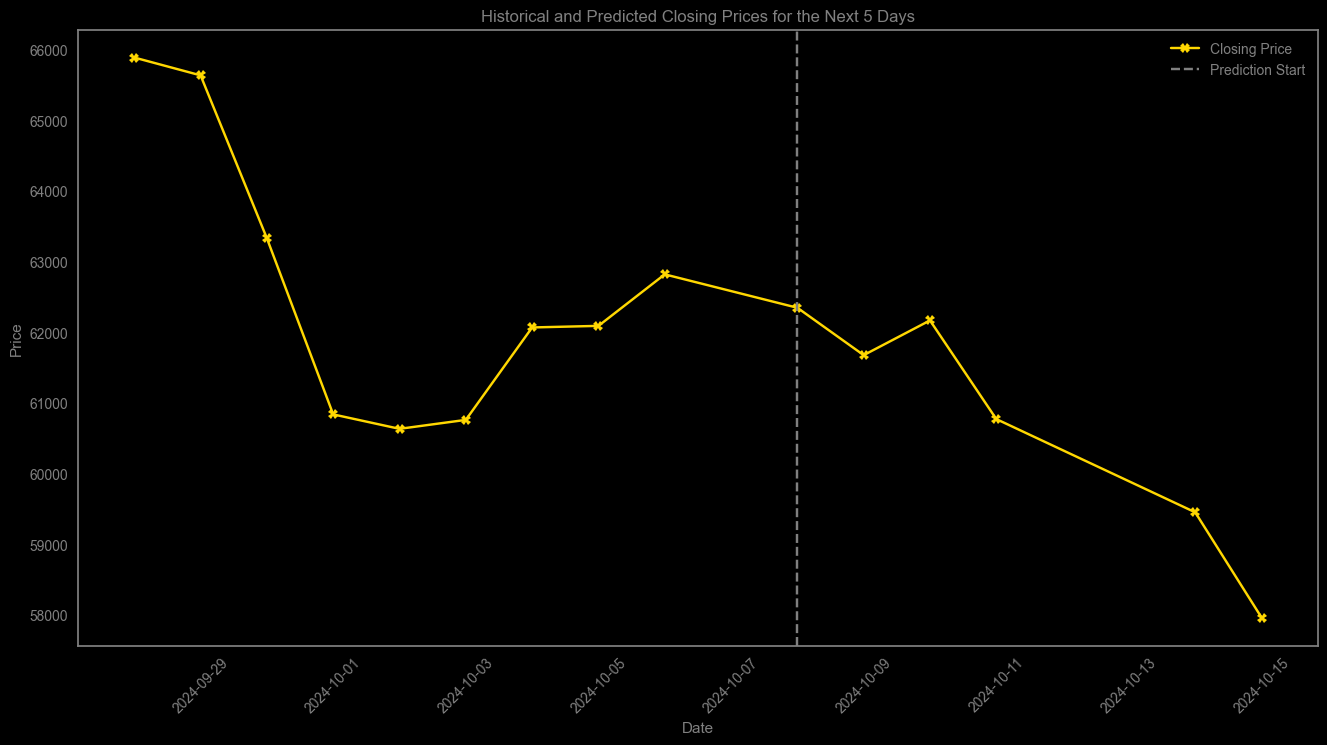

In [66]:
recent_data = df['Close'].tail(10)

# Combine historical and predicted data
combined_data = pd.concat([recent_data, future_df['Predicted Close']])

# Plot historical and predicted closing prices
plt.figure(figsize=(16, 8))
plt.plot(combined_data.index, combined_data, label='Closing Price', color='gold', marker='X')
plt.axvline(x=recent_data.index[-1], color='grey', linestyle='--', label='Prediction Start')
plt.title('Historical and Predicted Closing Prices for the Next 5 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

- Model is Predicting a sharp decline to 230 in next 5 business days after reaching weekly high of 255 WOW! this is BIG news if this becomes true, it will be a huge opportunity to buy the dip. #stockmarket #trading

Conclusion: **
===========
- We now know PGR has the lowest risk stock, however it is going under short term swing and expecting a dip in next 5 days, all our models predicted downtrend and our best scoring model gave us an eye opening insight.
- This will help us to make informed decisions when and how to enter market. 